# Proyecto 03 - Series de Tiempo

## Dataset: Flujo Vehicular por Unidades de Peaje AUSA

**Recuerda descargar el dataset de [aquí](https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-peaje-ausa). Deberás descargar -  al menos para comenzar - los años 2017, 2018 y 2019.**

En este notebook te dejamos unas celdas para que puedas comenzar a trabajar con este dataset para los años 2017, 2018 y 2019. Si deseas utilizar otros años, ten en cuenta que deberás hacer el preprocesamiento correspondiente, ya que la estructura de los datos puede variar.

**Importante:** Para el proyecto, debes comenzar con los datos de la autopista Illia, pago en Efectivo.

### Exploración de datos

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿Cuáles son los días y horarios de mayor tráfico? También, estudia autocorrelaciones, resampleos, etc.

#### Componentes de la serie

1. Calcula las componentes estacionales y tendencia de la serie. Interpreta los resultados, si es necesario con información auxiliar (por fuera del dataset) o elementos del dataset que no estés utilizando (por ejemplo, si la tendencia es negativa, ¿puede ser porque se migre a otras formas de pago?).
1. ¿La serie posee valores atípicos? Si es así, interpreta, si es necesario con información auxiliar. **Pista**: primer semestre 2019.

### Predicción a Futuro

Debes implementar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019. 

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada tus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo. 
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?
1. Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?
1. Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?
1. ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

## Repositorio GitHub: https://github.com/javierdichiachio/ACAMICA_PROYECTOS_JD

# 1. PREPARACIÓN DEL DATASET

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
sns.set()
import locale  #Este modulo permite que los encodings sean transformados al lenguaje de la configuracion de la computadora
locale.setlocale(locale.LC_TIME, '')
import warnings
warnings.filterwarnings('ignore')

In [96]:
data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2017.csv', sep =',')

In [97]:
data_2019.info()
data_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16


In [98]:
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,NO COBRADO,29
1,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,TELEPASE,9
2,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,NO COBRADO,73
3,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,TELEPASE,39
4,2018,2018-01-01,2,3,Lunes,Alberdi,Centro,Liviano,NO COBRADO,115


In [99]:
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,NO COBRADO,25
1,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,TELEPASE,7
2,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,NO COBRADO,5
3,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,2
4,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,94


Investiguemos que valores toman los campos **estacion, sentido, tipo_vehiculo y forma_pago**

In [100]:
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())

['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [101]:
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [102]:
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())

['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [103]:
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']


##### Podemos decir entonces que los años 2017, 2018 y 2019 tienen las siguientes columnas con la siguiente información:

**periodo**: año del dset 

**fecha**: año dia mes

**hora_inicio** hora de inicio de la cuenta de vehiculos (DROP)

**hora_fin** hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

**dia**: dia de la semana 

**estacion**: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB)

**sentido**: Centro o Provincia

**tipo_vehiculo**: Liviano o Pesado

**forma_pago**: Hay varias y varian entre los años.

**cantidad_pasos**: Cantidad de vehiculos

Vamos a estar trabajando con la estación **Illia** y la forma de pago **Efectivo**


In [104]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
dataset = dataset[mask]

#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset.head()

,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
80,2019-01-01,2,Martes,Centro,Liviano,537
86,2019-01-01,2,Martes,Centro,Pesado,1
88,2019-01-01,2,Martes,Provincia,Liviano,443
94,2019-01-01,2,Martes,Provincia,Pesado,1
149,2019-01-01,3,Martes,Centro,Liviano,769


In [105]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.drop(columns=['fecha','hora_fin'], inplace = True)

dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha2
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [106]:
#Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [107]:
#Reordenamos el dataset por fecha
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)
dataset

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
1,Domingo,Provincia,Liviano,9,2017-01-01 00:00:00
2,Domingo,Provincia,Liviano,644,2017-01-01 00:00:00
3,Domingo,Provincia,Pesado,6,2017-01-01 00:00:00
4,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
...,...,...,...,...,...
238864,Martes,Provincia,Liviano,556,2019-12-31 22:00:00
238865,Martes,Provincia,Pesado,1,2019-12-31 22:00:00
238866,Martes,Centro,Liviano,580,2019-12-31 22:00:00
238867,Martes,Centro,Liviano,214,2019-12-31 23:00:00


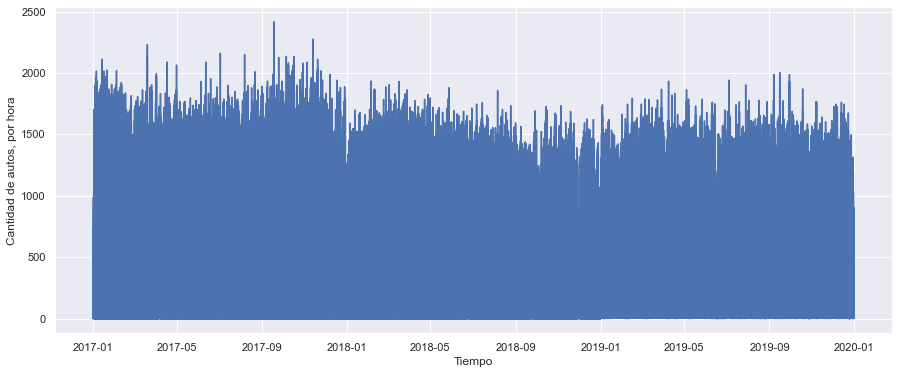

In [108]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(dataset.fecha, dataset.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

In [109]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario = dataset.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1095, 1)


,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486


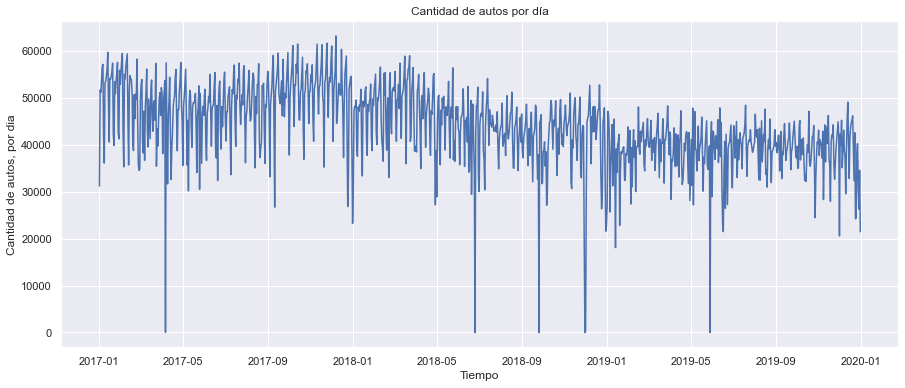

In [110]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.title('Cantidad de autos por día')
plt.show()

In [111]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238869 entries, 0 to 238868
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   dia             238869 non-null  object        
 1   sentido         238869 non-null  object        
 2   tipo_vehiculo   238869 non-null  object        
 3   cantidad_pasos  238869 non-null  int64         
 4   fecha           238869 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 9.1+ MB


# 2. ANÁLIS EXPLORATORIO DE DATOS:

En primer lugar, analizaremos algunas características de nuestro dataset como para entender más acerca del problema. En primer medida sería útil conocer cuáles son los días y horas de la semana con más tráfico, la proporción de tráfico liviano y pesado que frecuentan la estación, y la proporción de registros que corresponden a cada sentido por el que se cruza a la estación.

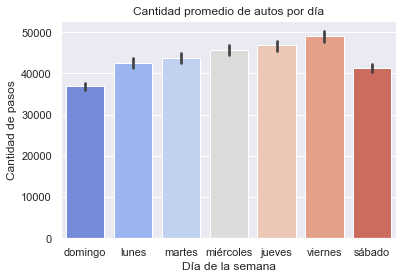

In [112]:
#Agregamos la columna con el día a nuestra serie de tiempo:
diario['dia'] = diario.index.strftime('%A')

#Graficamos la cantidad de pasos promedio por día:
plt.figure(figsize = (6,4))
sns.barplot(data = diario, x = 'dia', y = 'cantidad_pasos', palette = 'coolwarm')
plt.ylabel('Cantidad de pasos')
plt.xlabel('Día de la semana')
plt.title('Cantidad promedio de autos por día')
plt.show()

In [113]:
#Obtenemos los valores de promedio de pasos por día:
promedio_diario = diario.groupby(by = 'dia', sort = True).agg({'cantidad_pasos':'mean'})
promedio_diario

,cantidad_pasos
dia,
domingo,36891.471338
jueves,46808.775641
lunes,42620.299363
martes,43729.624204
miércoles,45676.448718
sábado,41293.044872
viernes,49020.974359


Como podemos ver, el día más concurrido de la semana es el día **viernes**, con una cantidad de pasos promedio de casi 50.000 autos.

A continuación realizaremos el mismo análisis para ver cuales son las horas con más afluencia de tráfico en la estación:

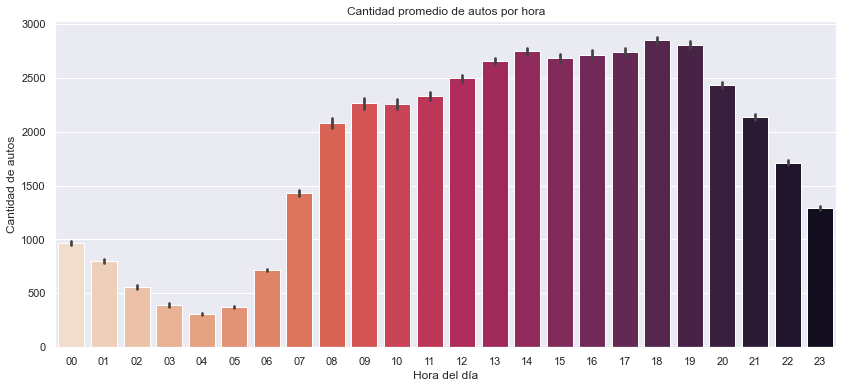

In [114]:
#En primer lugar, resampleamos nuestro dataset para llevarlo a nivel hora:
serie_horaria = dataset.resample('H', on = 'fecha').sum()

#Agregamos la columna 'hora' a nuestra serie de tiempo por hora:
serie_horaria['hora'] =  serie_horaria.index.strftime('%H')

#Observamos la cantidad de autos promedio por hora
plt.figure(figsize = (14,6))
sns.barplot(data = serie_horaria, x = 'hora', y = 'cantidad_pasos', palette = 'rocket_r')
plt.ylabel('Cantidad de autos')
plt.xlabel('Hora del día')
plt.title('Cantidad promedio de autos por hora');

In [115]:
#Obtenemos los valores de promedio de pasos por hora:
promedio_hora = serie_horaria.groupby(by = 'hora').agg({'cantidad_pasos':'mean'})
promedio_hora

,cantidad_pasos
hora,
00,965.425571
01,802.845662
02,561.273059
03,392.600913
04,305.808219
05,375.643836
06,713.805479
07,1428.322374
08,2079.431050


Adicionalmente, sería interesante conocer la distribución del tráfico en cuanto al tipo de vehículo y el sentido en el que cruzan la estación:

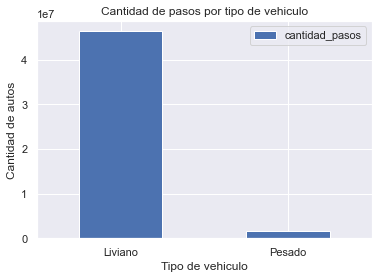

In [116]:
#Observamos el tipo de vehículos que frecuentan la estación:
plt.rcParams['figure.figsize'] = [6,4]
dataset.groupby('tipo_vehiculo').sum().plot.bar()
plt.ylabel('Cantidad de autos')
plt.xlabel('Tipo de vehiculo')
plt.xticks(rotation=0)
plt.title('Cantidad de pasos por tipo de vehiculo')
plt.show();

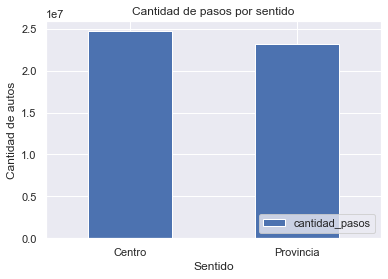

In [117]:
#Observamos la cantidad de pasos por sentido:
plt.rcParams['figure.figsize'] = [6,4]
dataset.groupby('sentido').sum().plot.bar()
plt.ylabel('Cantidad de autos')
plt.xlabel('Sentido')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.title('Cantidad de pasos por sentido')
plt.show()

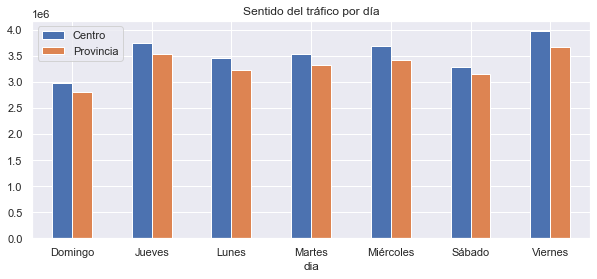

In [118]:
#Asimismo, observamos la cantidad de pasos por sentido en función al día de la semana:
plt.rcParams['figure.figsize'] = [10,4]
dataset.groupby(['sentido','dia']).sum().cantidad_pasos.unstack(0).plot.bar()
plt.legend(loc='upper left')
plt.xticks(rotation=0)
plt.title('Sentido del tráfico por día');

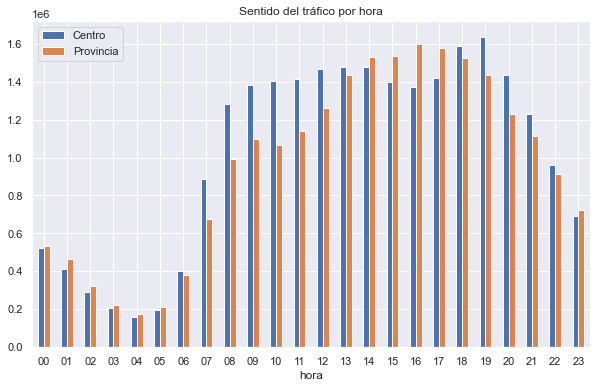

In [119]:
#Y por último, observamos la cantidad de pasos por sentido en función a la hora del día:
dataset['hora'] =  [d.strftime('%H') for d in dataset.fecha]
plt.rcParams['figure.figsize'] = [10,6]
dataset.groupby(['sentido','hora']).sum().cantidad_pasos.unstack(0).plot.bar()
plt.legend(loc='upper left')
plt.xticks(rotation=0)
plt.title('Sentido del tráfico por hora');

Tal cual podemos ver, el tipo de vehículo que más frecuenta la estación es el liviano, la franja horaria con más afluencia de tráfico es entre las 18-19 horas (momento en que termina la jornada laboral/escolar), el número de pasos por día en dirección hacia el Centro es mayor a los pasos hacia Provincia, y el tráfico disminuye los fines de semana, por lo cual una primera conclusión podría ser es que la estación es muy utilizada por particulares que ingresan a la ciudad los días de semana, ya sea para trabajar o llevar a sus hijos al colegio. Asimismo, atendiendo al último gráfico, podemos ver que el tráfico hacia el centro es mayor en las primeras horas de la mañana, revirtiendose alrededor de las horas en que finaliza la jornada laboral/educativa promedio (entre las 17 y 20 horas).

A continuación haremos una transformación de nuestra serie para analizar el comportamiento de la serie de tiempo a nivel semanal y mensual:

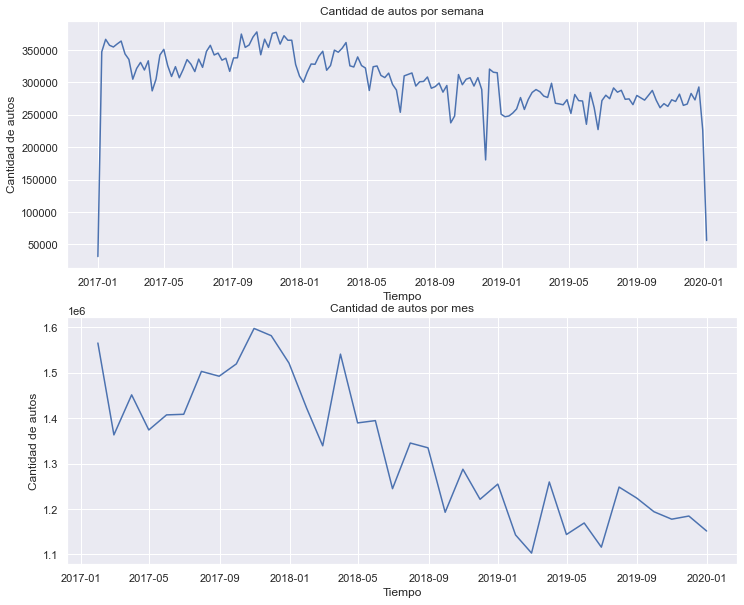

In [120]:
#Resampleamos el dataset para llevarlo a nivel semanal y mensual y observar gráficamente las series temporales:

semanal = dataset.resample('W', on = 'fecha').sum()
mensual = dataset.resample('M', on = 'fecha').sum()

#Graficamos
plt.figure(figsize = (12,10))

plt.subplot(2,1,1)
plt.plot(semanal.index, semanal.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos')
plt.title('Cantidad de autos por semana')

plt.subplot(2,1,2)
plt.plot(mensual.index, mensual.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos')
plt.title('Cantidad de autos por mes')
plt.savefig('Resampleo semanal y mensual.jpg')
plt.show()

Otro gráfico que sería interesante analizar sería la evolución de la cantidad mensual de autos que pasa por la estación a través de los años:

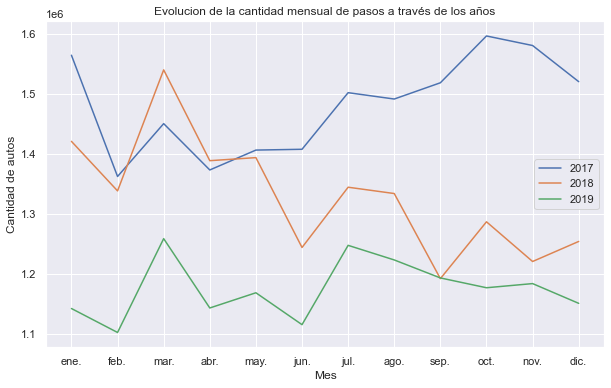

In [121]:
#Comparación de la serie en los distintos años

#Agregamos el mes del año, en formato string, a nuestro dataset:
mensual['mes'] =  mensual.index.strftime('%b')

#Graficamos:
plt.figure(figsize = (10,6))
plt.plot(mensual.mes.iloc[:12].values, 'cantidad_pasos', data=mensual.iloc[:12], label = '2017')
plt.plot(mensual.mes.iloc[12:24].values, 'cantidad_pasos', data=mensual.iloc[12:24], label = '2018')
plt.plot(mensual.mes.iloc[24:36].values, 'cantidad_pasos', data=mensual.iloc[24:36], label = '2019')
plt.xlabel('Mes')
plt.ylabel('Cantidad de autos')
plt.legend(loc= 'best', frameon = True);
plt.title('Evolucion de la cantidad mensual de pasos a través de los años');

Como se pueden observar en los dos últimos gráficos, existiría una tendencia negativa o descendente en la cantidad de autos que frecuentan la estación de peaje abonando en efectivo. Otro aspecto a tener en cuenta es que se observa una comportamiento que se repite a través de los años (o estacionalidad): la cantidad de autos disminuye en febero (al final de las vacaciones de verano), luego incrementa en marzo (al comienzo del ciclo escolar), luego empieza a descender levemente, hasta que en el mes de julio vuelve a incrementar.

## Descomposición de la serie en sus componentes (Tendencia, Estacionalidad y Ruido):

A continuación comprobaremos la **tendencia** de la serie aplcando la técnica de **media móvil o rolling window**, luego la técnica de **regresión lineal**, obtendremos el resto de los componentes de la serie (estacionalidad y ruido) manualmente, y por último descompondremos a la serie en sus componentes a través de la librería de Statmodels:

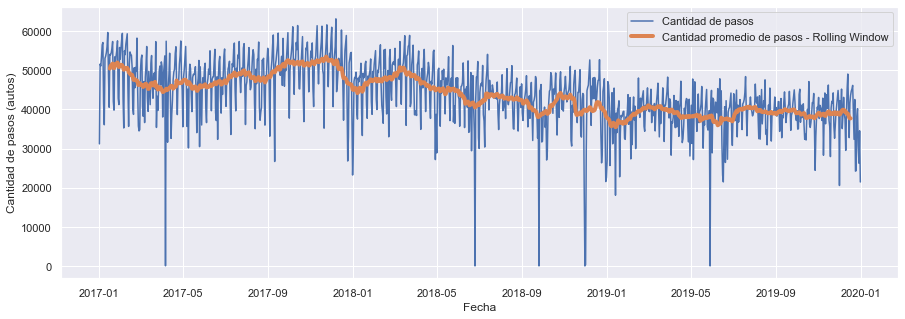

In [122]:
#Establecemos una ventana temporal mensual sobre la que se calculará la cantidad de pasos promedio y aplicamos rolling window:

ventana = 30 #Ventana de 30 días (un mes)
diario_promedio_tendencia = diario['cantidad_pasos'].rolling(window=ventana, center = True).mean()

#Graficamos:
plt.figure(figsize = (15,5))
plt.plot(diario.index, diario.cantidad_pasos, label = 'Cantidad de pasos')
plt.plot(diario_promedio_tendencia, lw = 4, label = 'Cantidad promedio de pasos - Rolling Window')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos (autos)')
plt.legend()
plt.show()

Al aplicar la técnica de la media móvil sobre el dataset diario, también se observa una tendencia negativa en nuestra serie.

A continuación aplicaremos el método de **regresión lineal** para encontrar la tendencia, esto es, ajustaremos una regresión lineal a la serie y analizaremos sus resultados:

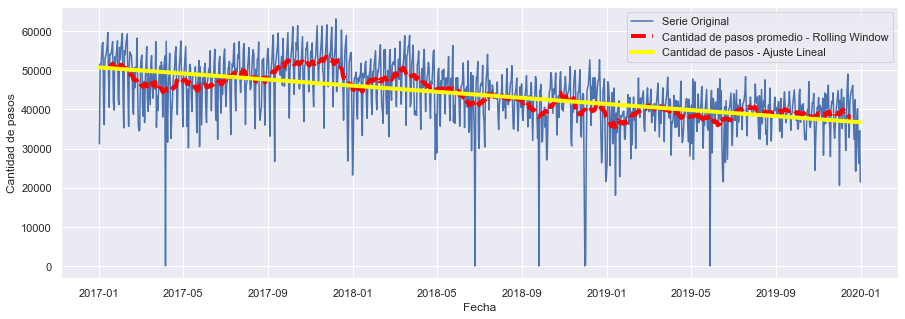

In [123]:
#Agregamos la columna de fechas en valores, que luego utilizaremos para entrenar el modelo:
diario['fecha_numeros'] = diario.index.map(datetime.datetime.toordinal)

#Importamos e instanciamos el modelo de regresión lineal:
from sklearn.linear_model import LinearRegression
reg_lineal = LinearRegression()

#Entrenamos el modelo y predecimos:
reg_lineal.fit(diario.fecha_numeros.values.reshape(-1, 1), diario.cantidad_pasos)
pred = reg_lineal.predict(diario.fecha_numeros.values.reshape(-1, 1))

#Analizamos gráficamente:
plt.figure(figsize = (15,5))
plt.plot(diario.index, diario.cantidad_pasos, label = 'Serie Original')
plt.plot(diario_promedio_tendencia, ls = '--', lw = 4, label = 'Cantidad de pasos promedio - Rolling Window', color = 'red')
plt.plot(diario.index, pred, lw = 4, label = 'Cantidad de pasos - Ajuste Lineal', color = 'yellow')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.legend()
plt.show()

La técnica de regresión lineal nos da como resultado una recta con pendiente negativa, lo que también nos indica una tendencia descendente en la cantidad de autos que cruzan la estación de peaje abonando en efectivo.

A continuación obtenemos los otros componentes de la serie manualmente:

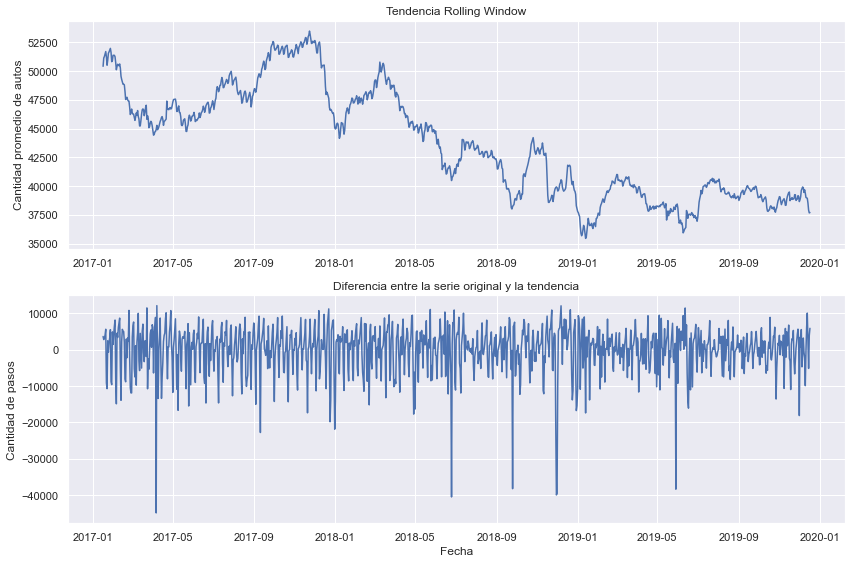

In [124]:
plt.figure(figsize = (12,8))

plt.subplot(2,1,1)
plt.title('Tendencia Rolling Window')
plt.plot(diario_promedio_tendencia)
plt.ylabel('Cantidad promedio de autos')

plt.subplot(2,1,2)
plt.title('Diferencia entre la serie original y la tendencia')
plt.plot(diario.index, diario.cantidad_pasos - diario_promedio_tendencia)
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')

plt.tight_layout()
plt.savefig('Descomposicion manual de la serie diaria.jpg')
plt.show()

La diferencia entre la serie orginal y la tendencia rolling window está compuesta por factores de estacionalidad y ruido, pero para poder observarlos claramente utilizaremos las herramientas que nos brinda la librería **statmodels**, que nos permite descomponer la serie en sus componentes:

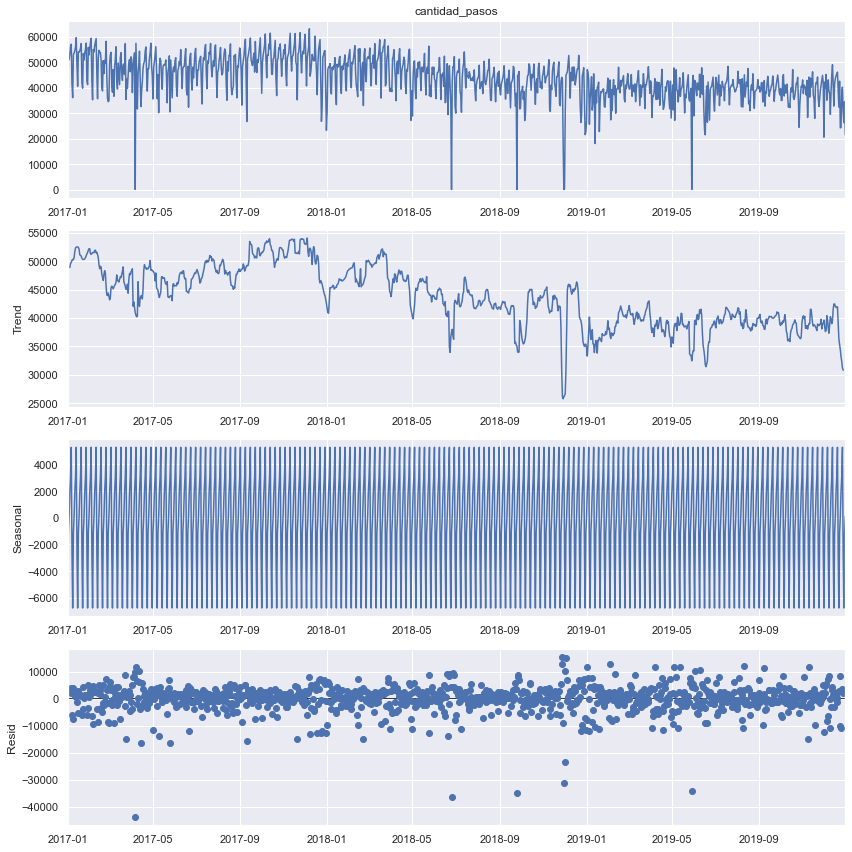

In [125]:
#Importamos el modulo de la librería y graficamos:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(diario.cantidad_pasos, model='additive')
import matplotlib
matplotlib.rcParams['figure.figsize'] = [12,12]
result.plot()
plt.savefig('Serie Diaria statmodels')
plt.show()

Realizamos la misma descomposición para las **series semanales y mensuales**:

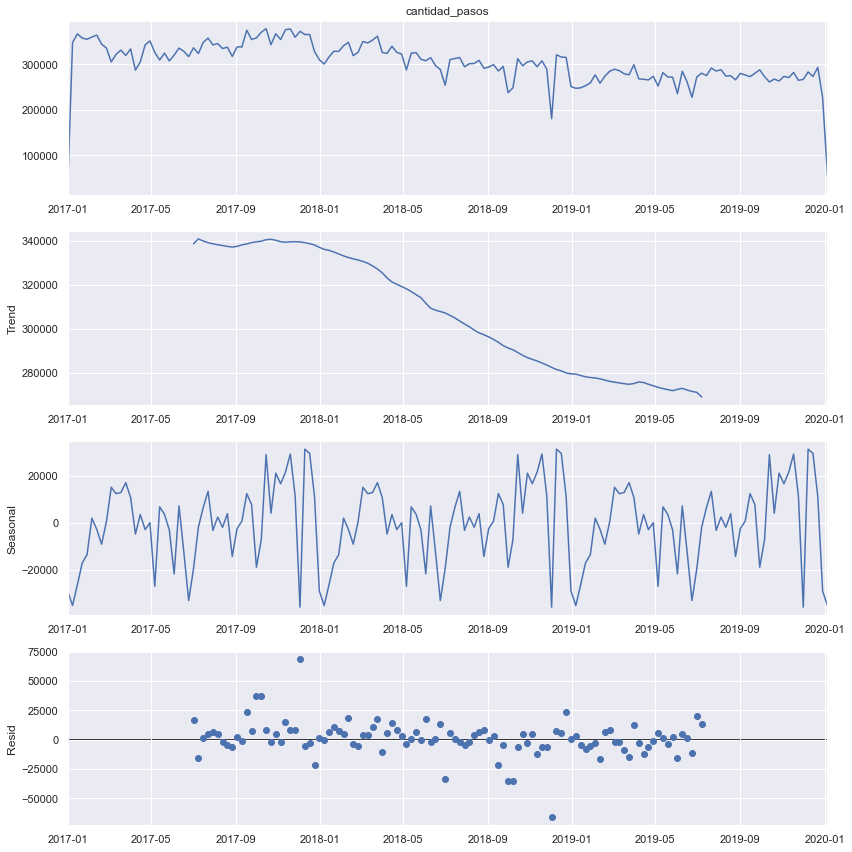

In [126]:
#Descomponemos la serie SEMANAL:
result2 = seasonal_decompose(semanal.cantidad_pasos, model='additive')
import matplotlib
matplotlib.rcParams['figure.figsize'] = [12,12]
result2.plot()
plt.savefig('Serie Semanal statmodels')
plt.show()

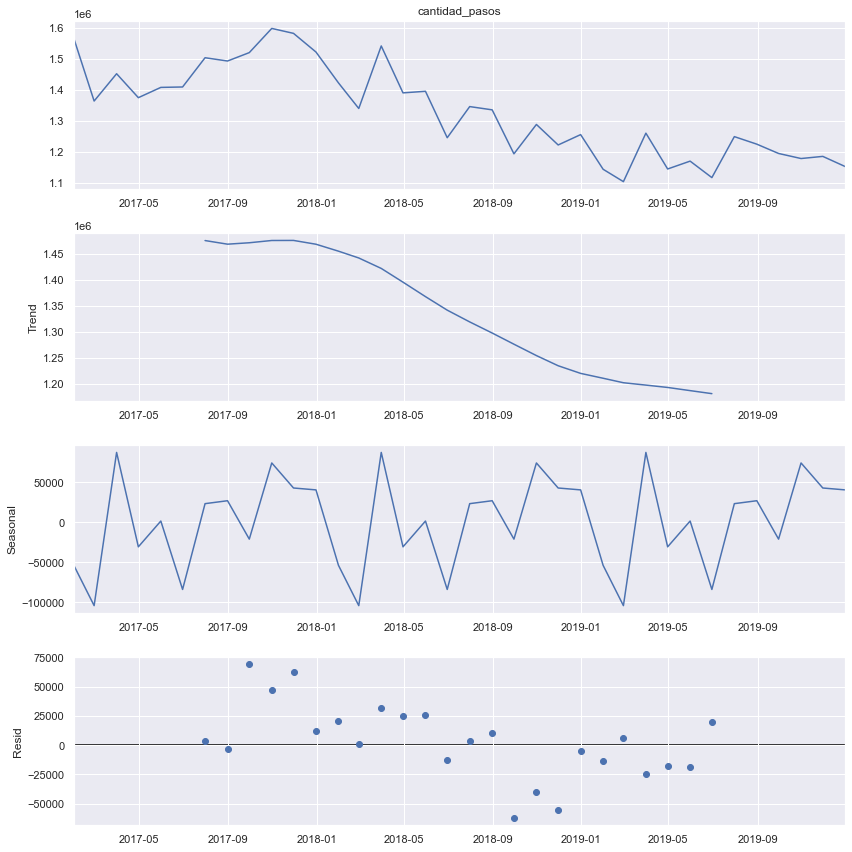

In [127]:
#Descomponemos la serie MENSUAL:
result3 = seasonal_decompose(mensual.cantidad_pasos, model='additive')
import matplotlib
matplotlib.rcParams['figure.figsize'] = [12,12]
result3.plot()
plt.savefig('Serie Mensual statmodels')
plt.show()

Al analizar nuestra serie a nivel mensual es cuando más claro se observa la **tendencia negativa** de la serie y el comportamiento repetitivo o estacional de la misma, el cual muestra una caída en el tráfico vehicular en los meses de vacaciones escolares.

Recordemos que la información que estamos analizando es para el método de pago **"Efectivo"** de la estación, por lo que resultaría interesante analizar si la tendencia negativa de nuestra serie tiene como contrapartida un crecimiento en las otras formas de pago de la estación o si simplemente disminuyo la cantidad de vehículos que atraviesa la misma (menor utilización de la autopista):

In [128]:
#Volvemos a crear un dataset uniendo la información de los diferentes años:
dataset2 = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia:
mask = dataset2.estacion == 'Illia'
dataset2 = dataset2[mask]

#Quitamos las columnas que no vamos a utilizar:
dataset2.drop(columns = ['periodo','hora_inicio','estacion'], inplace = True)

#Hacemos las transformaciones necesarias para llevar a formato fecha:
dataset2['fecha2'] = pd.to_datetime(dataset2.fecha) + pd.to_timedelta(dataset2.hora_fin, unit = 'h')
dataset2.drop(columns=['fecha','hora_fin'], inplace = True)
dataset2.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset2.sort_values('fecha', inplace = True)
dataset2.reset_index(drop=True, inplace = True)
dataset2.head()

,dia,sentido,tipo_vehiculo,forma_pago,cantidad_pasos,fecha
0,Domingo,Centro,Liviano,TELEPASE,459,2017-01-01
1,Domingo,Provincia,Pesado,TELEPASE,3,2017-01-01
2,Domingo,Provincia,Pesado,EFECTIVO,1,2017-01-01
3,Domingo,Provincia,Pesado,TELEPASE,7,2017-01-01
4,Domingo,Provincia,Pesado,EFECTIVO,6,2017-01-01


In [129]:
#Resampleamos nuestros datos para agrupar por dia:
diario2 = dataset2.resample('D', on = 'fecha').sum()
print(diario2.shape)
diario2.head()

(1095, 1)


,cantidad_pasos
fecha,
2017-01-01,45478
2017-01-02,89289
2017-01-03,92602
2017-01-04,95813
2017-01-05,100044


Una vez que tenemos la información de la estación que incluye la cantidad de autos que la atraviesan por día sin importar la forma de pago utilizada, obtendremos la tendencia de la misma, ajustandole una regresión lineal:

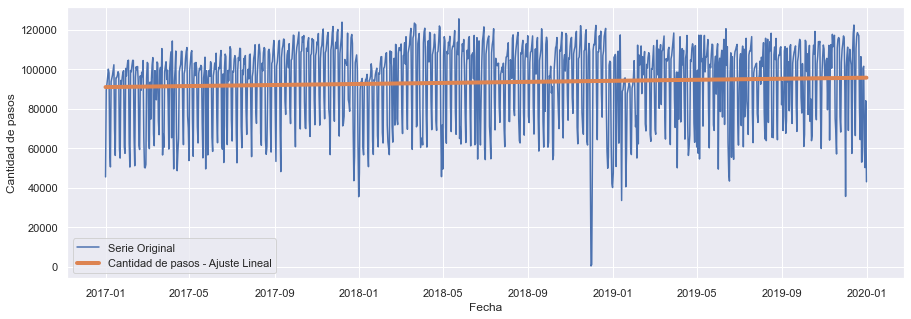

In [130]:
#Agregamos la columna de fechas en valores, que luego utilizaremos para entrenar el modelo:
diario2['fecha_numeros']=diario2.index.map(datetime.datetime.toordinal)

#Importamos e instanciamos el modelo de regresión lineal:
from sklearn.linear_model import LinearRegression
reg_lineal2 = LinearRegression()

#Entrenamos el modelo y predecimos:
reg_lineal2.fit(diario2.fecha_numeros.values.reshape(-1, 1), diario2.cantidad_pasos)
pred2 = reg_lineal2.predict(diario2.fecha_numeros.values.reshape(-1, 1))

#Analizamos gráficamente:
plt.figure(figsize = (15,5))
plt.plot(diario2.index, diario2.cantidad_pasos, label = 'Serie Original')
plt.plot(diario2.index, pred2, lw = 4, label = 'Cantidad de pasos - Ajuste Lineal')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.legend()
plt.show()

La figura anterior nos muestra que la serie original tiene una **tendencia estacionaria en la media**, por lo que el decrecimiento en la serie de la forma de pago "Efectivo" puede estar originado por otro factor, como por ejemplo el cambio a otra modalidad de pago. Para comprobar esto, deberíamos hacer una serie distinta para cada una de las distintas formas de pago que queremos comparar, por lo que sólo realizaremos la comparación con la segunda forma de pago más utilizada:

In [131]:
dataset2['forma_pago'].value_counts()

EFECTIVO                238869
TELEPASE                204612
EXENTO                  105903
INFRACCION               78000
NO COBRADO               66679
TARJETA DISCAPACIDAD     41336
T. DISCAPACIDAD          17139
MONEDERO                    14
Name: forma_pago, dtype: int64

Tal cual nos muestran estos resultados, la **segunda forma de pago** más utilizada es **"Telepase"**, por lo que también analizaremos la tendencia de dicha seria ajustandole una función lineal:

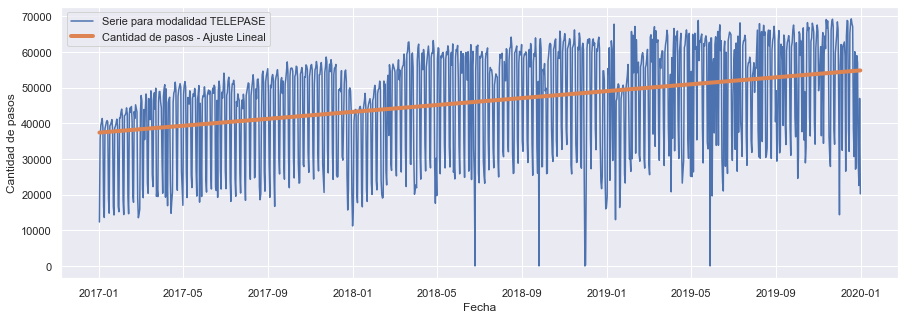

In [132]:
#Filtramos la segunda forma de pago más utilizada en el dataset:
dataset2 = dataset2[dataset2.forma_pago == 'TELEPASE']

#Resampleamos nuestros datos para agrupar por dia:
diario2 = dataset2.resample('D', on = 'fecha').sum()

#Agregamos la columna de fechas en valores, que luego utilizaremos para entrenar el modelo:
diario2['fecha_numeros']=diario2.index.map(datetime.datetime.toordinal)

#Importamos e instanciamos el modelo de regresión lineal:
from sklearn.linear_model import LinearRegression
reg_lineal2 = LinearRegression()

#Entrenamos el modelo y predecimos:
reg_lineal2.fit(diario2.fecha_numeros.values.reshape(-1, 1), diario2.cantidad_pasos)
pred2 = reg_lineal2.predict(diario2.fecha_numeros.values.reshape(-1, 1))

#Analizamos gráficamente:
plt.figure(figsize = (15,5))
plt.plot(diario2.index, diario2.cantidad_pasos, label = 'Serie para modalidad TELEPASE')
plt.plot(diario2.index, pred2, lw = 4, label = 'Cantidad de pasos - Ajuste Lineal')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.legend()
plt.show()

Tal cual se puede ver en el gráfico anterior, al ajustar una regresión lineal a la serie para la forma de pago "TELEPASE", se obtiene una recta con pendiente positiva, lo que indicaría una **tendencia creciente** en la utilización de esta modalidad, y en consecuencia se podría generar una **disminución en la utilización del pago en efectivo**.

A continuación analizamos la evolución mensual de las series de tiempo para ambas formas de pago:

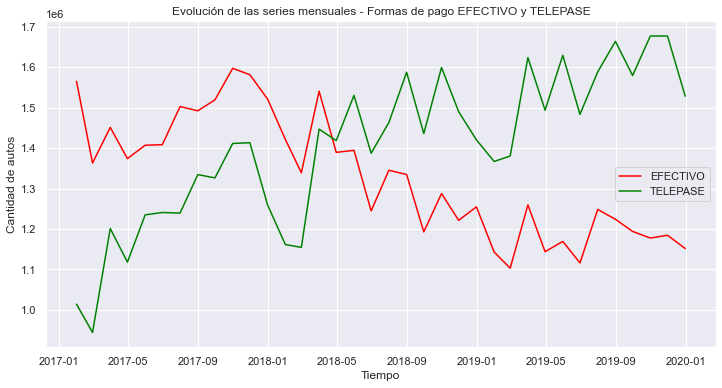

In [133]:
#Resampleamos la serie de TELEPASE a granularidad mensual:
mensual2 = dataset2.resample('M', on = 'fecha').sum()

#Graficamos la evolucion de ambas series a través de los años:
plt.figure(figsize = (12,6))
plt.plot(mensual.index, mensual.cantidad_pasos, label = 'EFECTIVO', color = 'red')
plt.plot(mensual2.index, mensual2.cantidad_pasos, label = 'TELEPASE', color = 'green')
plt.legend(loc = 'center right')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos')
plt.title('Evolución de las series mensuales - Formas de pago EFECTIVO y TELEPASE')
plt.show()

De acuerdo a lo expueso en el gráfico anterior, se puede observar que a partir de mayo de 2018 existe una migración de la forma de pago "Efectivo" a "Telepase", situación que, de acuerdo a información auxiliar, fue fomentada por el Gobierno a través de descuentos en la utilización de Telepase.

Continuando con el Análisis Exploratorio de Datos, a continuación chequearemos si existen **valores faltantes** en nuestra serie, y luego realizaremos un análisis sobre los **valores atípicos (outliers)** de la serie.

## Valores Faltantes:

Al realizar un análisis sobre los valores faltantes de nuestra serie debemos tener en cuenta que pueden existir **dos tipos de valores faltantes**: Uno corresponde a una fecha sin su valor de cantidad de pasos (autos) **- VF TIPO 1**, y el otro corresponde a una fecha que no está en la serie (no está la fecha ni la cantidad de pasos) **- VF TIPO 2**.

Por tal motivo, comprobaremos la existencia de ambos:

In [134]:
#Comprobamos la existencia de valores faltantes de TIPO 1:
print(diario.isnull().sum())

cantidad_pasos    0
dia               0
fecha_numeros     0
dtype: int64


In [135]:
##Comprobamos la existencia de valores faltantes de TIPO 2:
diario['fechas'] = diario.index
diario['fechas_check'] = diario.fechas.diff()
diario.fechas_check.value_counts()

1 days    1094
Name: fechas_check, dtype: int64

Como podemos ver, existen 1094 registros separados por un día de diferencia, por lo que podemos concluir que la serie con la que estamos trabajando **no tiene valores faltantes** de ningún tipo.

## Valores Atípicos o Outliers:

Para comenzar con el análisis de valores atípicos de nuestra serie de tiempo, deberíamos obtener, en primer lugar, los valores estadísticos del mismo:

In [41]:
diario.describe().T

,count,mean,std,min,25%,50%,75%,max
cantidad_pasos,1095.0,43712.859361,8192.736927,0.0,39061.5,43761.0,49498.0,63127.0
fecha_numeros,1095.0,736877.000000,316.243577,736330.0,736603.5,736877.0,737150.5,737424.0


De acuerdo a lo observado en la tabla anterior, la **cantidad promedio** de autos que cruzan la estación **por día** es de aproximadamente **43.700**, con una **desviación estándar** aproximada de **8.200** autos. Dado que esta última es algo elevada, si aplicáramos el criterio de las tres sigmas tendríamos límites muy amplios, por lo que considero que es mejor el criterio del rango intercuartílico para eliminar a los valores atípicos:

In [42]:
#Obtenemos los valores correspondientes al primer y tercer cuartil:
q25 = diario['cantidad_pasos'].quantile(0.25)
q75 = diario['cantidad_pasos'].quantile(0.75)

#Obtenemos el valor del rango intercuartílico:
IQR = q75 - q25

#Obtenemos los umbrales mínimos y máximos:
minimo = q25 - 1.5 * IQR
maximo = q75 + 1.5 * IQR

#Convertimos en nulos los valores por debajo del límite mínimo y los por arriba del límite máximo:
diario_depurado = diario.copy()
diario_depurado.cantidad_pasos[diario_depurado.cantidad_pasos > maximo] = np.nan
diario_depurado.cantidad_pasos[diario_depurado.cantidad_pasos < minimo] = np.nan

#Reemplazamos valores nulos a través de un método de interpolación:
print(diario_depurado.isna().sum())
diario_depurado = diario_depurado.interpolate()
print(diario_depurado.isna().sum())

cantidad_pasos    16
dia                0
fecha_numeros      0
dtype: int64
cantidad_pasos    0
dia               0
fecha_numeros     0
dtype: int64


La serie original contenía 16 valores considerados atípicos, que fueron reemplazados por valores obtenidos por la función 'interpolate'. A continuación se observa gráficamente la serie antes y después del filtrado de valores atípicos realizado:

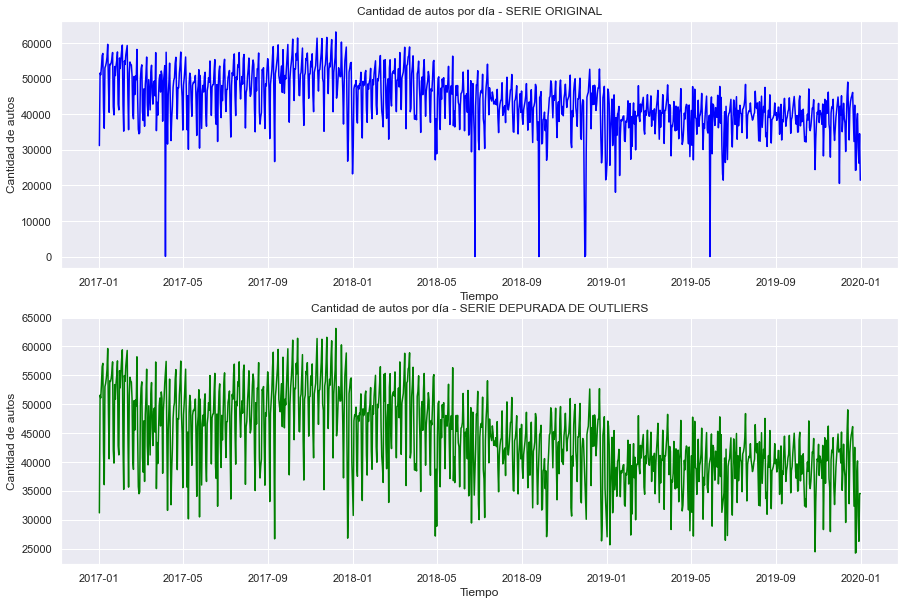

In [43]:
#Graficamos
plt.figure(figsize = (15,10))

plt.subplot(2,1,1)
plt.plot(diario.index, diario.cantidad_pasos, color='blue')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos')
plt.title('Cantidad de autos por día - SERIE ORIGINAL')

plt.subplot(2,1,2)
plt.plot(diario_depurado.index, diario_depurado.cantidad_pasos, color='green')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos')
plt.title('Cantidad de autos por día - SERIE DEPURADA DE OUTLIERS')
plt.savefig('Serie diaria depurada.jpg')
plt.show()

Como podemos ver en los gráficos anteriores, se consideraron como valores atípicos todos los días donde la cantidad de autos que pasaba por la estación era inferior a 25.000, y aquellos donde la cantidad era superior a 65.000.

Resampleamos la serie depurada de outliers a niveles semanal y mensual:

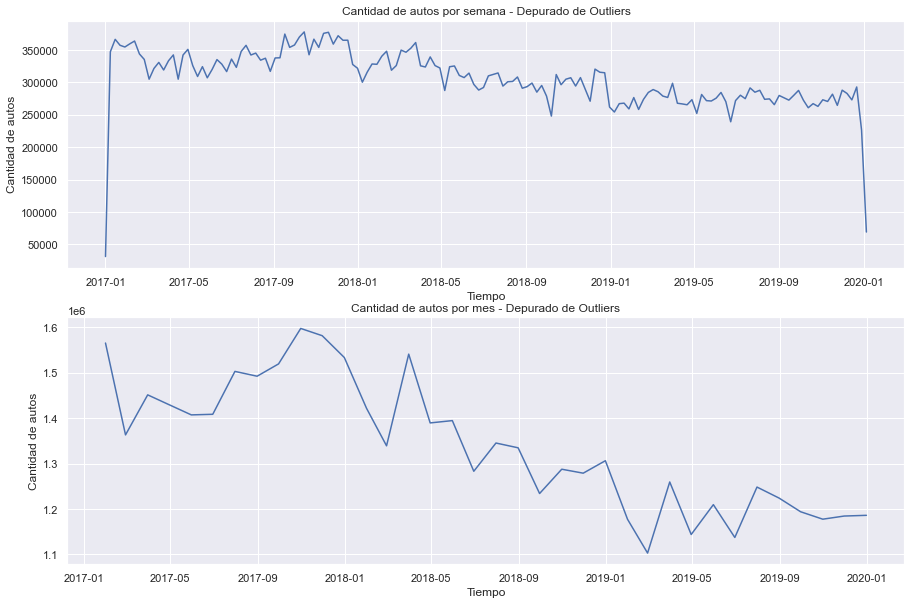

In [44]:
#Resampleamos el dataset para llevarlo a nivel semanal y mensual y observar gráficamente las series temporales:

semanal_depurado = diario_depurado.resample('W').sum()
mensual_depurado = diario_depurado.resample('M').sum()

#Graficamos
plt.figure(figsize = (15,10))

plt.subplot(2,1,1)
plt.plot(semanal_depurado.index, semanal_depurado.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos')
plt.title('Cantidad de autos por semana - Depurado de Outliers')

plt.subplot(2,1,2)
plt.plot(mensual_depurado.index, mensual_depurado.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos')
plt.title('Cantidad de autos por mes - Depurado de Outliers')
plt.savefig('Series semanal y mensual depuradas.jpg')
plt.show()

## Autocorrelación:

La **correlación estadística** nos muestra el nivel de correspondencia entre dos variables, mientras que la **autocorrelación en una serie de tiempo** consiste en medir la **correlación que existe entre las observaciones de la serie en distintas ventanas temporales (lags)**. En consecuencia, nos permite ver el nivel de relación (directa o indirecta) que existe entre las observaciones en distintas fechas, lo cual nos puede ser útil al momento de realizar nuestra predicción.

En este punto también realizaremos un análisis para cada una de las diferentes granularidades temporales: Diaria, Semanal y Mensual.

## Serie Diaria:

Para el caso de la serie diaria, estableceremos un número de 60 lags para realizar la comparación.

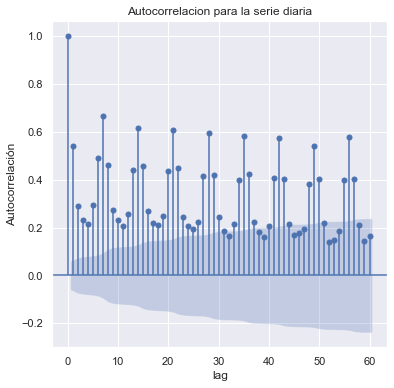

In [45]:
#Importamos el gráfico:
from statsmodels.graphics.tsaplots import plot_acf

#Graficamos la autocorrelación para la serie diaria:
matplotlib.rcParams['figure.figsize'] = [6,6]
plot_acf(diario_depurado.cantidad_pasos, lags = 60)
plt.xlabel('lag')
plt.ylabel('Autocorrelación')
plt.title('Autocorrelacion para la serie diaria')
plt.show()

Tal cual se observa en el gráfico anterior, la serie diaria presenta un **nivel más alto de autocorrelación cada 7 días**, alcanzando valores cercanos a 0.6 (correlación directa), lo que nos indica que **la cantidad de pasos por la estación de peaje** de un día determinado, **estaría directamente relacionada a la cantidad de pasos que existió el mismo día de semanas anteriores**.

## Serie Semanal:

Para el caso de la serie semanal, estableceremos un número de 26 lags (6 meses) para realizar la comparación.

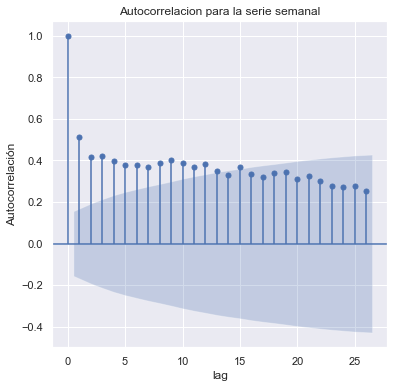

In [46]:
#Graficamos la autocorrelación para la serie semanal:
plot_acf(semanal_depurado.cantidad_pasos, lags = 26)
plt.xlabel('lag')
plt.ylabel('Autocorrelación')
plt.title('Autocorrelacion para la serie semanal')
plt.show()

En función a lo expuesto, podemos ver que en el caso de la **serie semanal** existe una menor autocorrelación que en el caso anterior, siendo **el valor de la semana inmediata anterior el más relacionado**, con una autocorrelación aproximada de 0.50.

## Serie Mensual:

Para el caso de la serie mensual, estableceremos un número de 24 lags (2 años) para realizar la comparación.

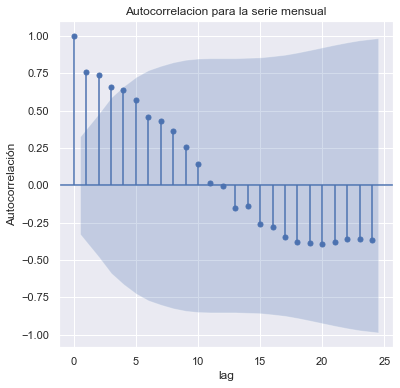

In [47]:
#Graficamos la autocorrelación para la serie mensual:
plot_acf(mensual_depurado.cantidad_pasos, lags = 24)
plt.xlabel('lag')
plt.ylabel('Autocorrelación')
plt.title('Autocorrelacion para la serie mensual')
plt.show()

Por último, al observar la serie mensual encontramos que los valores donde existe un **nivel de autocorrelación más alto** son los de los **dos meses inmediatos anteriores**, con correlaciones cercanas a 0.75, lo que implicaría una **fuerte relación directa** entre esos momentos temporales, mientras que a medida que incrementamos el valor del lag dicha correlación comienza a disminuir, volviendose negativa para lags superiores a un año.

Una vez que finalizado el Análisis Exploratorio de Datos, procedemos al siguiente paso en nuestro trabajo, que es la **predicción a futuro**.

# 3. PREDICCIÓN A FUTURO

A continuación se intentará encontrar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019.

Partiremos de un modelo Benchmark, luego se realizarán predicciones de tipo **One-Step Prediction** y **Multi-Step Prediction** aplicando técnicas de Machine Learning, y se evaluarán resultados. Todo el análisis se realizará para las distintas granularidades temporales de nuestra serie, esto es, a nivel diario, semanal y mensual, con el objetivo de encontrar el mejor modelo, es decir, con el nivel más bajo de error.

La métrica que se utilizará en primer medida para evaluar el desempeño de los modelos es el **error absoluto medio (MAE)**, que toma el promedio de las diferencias entre los valores reales y predichos, en valor absoluto. Esta es una métrica de error, por lo que a **más bajo MAE, mejor es el desempeño** de nuestro modelo.

Asimismo, dicha métrica se complementará con el **error porcentual absoluto medio (MAPE)**, que es una medida de la proporción del nivel de error sobre el promedio de cantidad de pasos en la unidad de tiempo respectiva, es decir, cuanto porcentaje representa el error el modelo sobre el promedio de valores contenidos en dicha unidad temporal.

In [48]:
#Importamos la métrica MAE para la evaluación de modelos:
from sklearn.metrics import mean_absolute_error

#Definimos una funcion que calcule y devuelva nuestras métricas:
def evaluar_modelo(y, y_pred, X_grupo, Grupo_evaluacion):
    '''Permite calcular las métricas de MAE y MAPE sobre los valores ingresados a la misma'''
    MAE = mean_absolute_error(y, y_pred)
    MAPE = MAE / X_grupo.mean() * 100
    print(f'Error en {Grupo_evaluacion}:', MAE, '- Porcentual(%):', MAPE)

## A. Modelo Benchmark

El modelo benchmark es un punto de partida, una base que nos sirve para luego comparar cuando incorporemos técnicas de Machine Learning más complejas. En nuestro caso, antes de realizar la predicción 'One-Step' consideraremos como **modelo Benchmark** a una **serie que predice** la cantidad de autos que pasan por la estación de peaje **utilizando el valor de la fecha anterior en la serie de tiempo**. Este modelo se aplicará sobre las series temporales diaria, semanal y mensual, con el objetivo de ver si se obtienen resultados diferentes.

## Serie Diaria:

En primer lugar, tenemos que dividir nuestros datos en los grupos de entrenamiento (Train) y prueba (Test), para lo cual consideraremos como prueba al último trimestre de 2019 (objetivo que queremos predecir), mientras que la diferencia de nuestra serie se repartirá entre el grupo de entrenamiento y la ventana de tiempo o número de variables que utilizaremos para predecir el valor siguiente en el modelo de 'One-Step Prediction' del apartado siguiente, también conocida como 'look back'.

In [49]:
#Definimos una ventana trimestral (90 días), sobre la cual se obtendrán los valores o atributos para realizar la predicción One-Step en el punto siguiente:
look_back = 90 

#Seleccionamos la variable que utilizaremos para alimentar nuestro modelo:
diario_pred = diario_depurado.cantidad_pasos

#Creamos las variables X e y, para rellenar luego con los valores correspondientes:
N = diario_pred.shape[0]
X = np.zeros((N - look_back,look_back))
y = np.zeros(N - look_back)

#Rellenamos los valores de X e y:
for i in range(X.shape[0]):
    X[i,:] = diario_pred.iloc[i:i+look_back]
    y[i] = diario_pred.iloc[i+look_back]
    
#Dividimos en grupos de entrenamiento y prueba:
N_test = 92 #correspondiente a los días del último trimestre del 2019
N_train = N - N_test - look_back # cantidad de instancias que vamos a usar para entrenar. 
N_total = N_train + N_test

length_total = N_train + N_test + look_back

#Definimos el grupo de entrenamiento
X_train = X[:N_train,:]
y_train = y[:N_train]

#Definimos el grupo de prueba
X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]

Una vez definidos los grupos de entrenamiento y prueba, establecemos el **modelo Benchmark**, donde cada valor predicho coincide con el valor del día anterior, y evaluamos:

In [50]:
#Establecemos el modelo Benchmark, donde cada valor predicho coincide con el valor del día anterior en la serie:
y_test_pred_benchmark = y[-1 + N_train:N_train+N_test - 1]

#Evaluamos el modelo con la función creada anteriormente:
evaluar_modelo(y_test, y_test_pred_benchmark, X_test, 'Test')

Error en Test: 4695.532608695652 - Porcentual(%): 11.975430448218507


Observamos la serie original y la serie obtenida por el modelo benchmark graficamente:

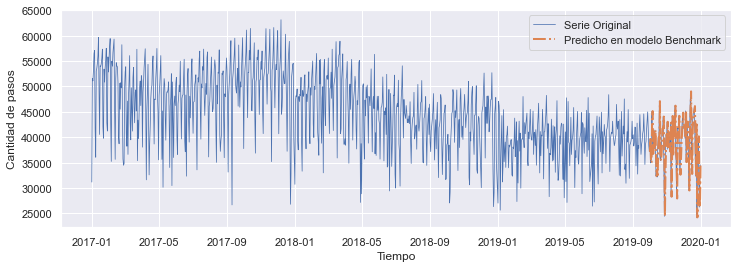

In [139]:
plt.figure(figsize=(12,4))
plt.plot(diario_pred.index[:length_total], diario_pred[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(diario_pred.index[N_train+look_back: length_total], y_test_pred_benchmark,'-.', lw = 2, label = 'Predicho en modelo Benchmark')

plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasos')
plt.legend()
plt.show()

De acuerdo con lo observado en los puntos anteriores, nuestro modelo Benchmark estaría prediciendo el flujo vehicular del último trimestre del 2019 con un **MAE de 4.695,53** sobre el grupo de prueba, lo que representa casi un **12% del valor promedio de pasos por día** en la estación.

A continuación realizaremos la misma predicción para las granularidades semanal y mensual, con el objeto de ver si obtenemos resultados diferentes:

## Serie Semanal:

En el caso de la serie semanal, el modelo Benchmark es aquel en el que la cantidad de pasos (autos) predicha coincide con la cantidad de autos de la semana anterior.

En este caso debemos separar la serie también en grupos de entrenamiento y prueba, y definir el look_back:

In [52]:
#Definimos una ventana trimestral (12 semanas), sobre la cual se efectuará la predicción One-Step en el punto siguiente:
look_back1 = 12 

#Seleccionamos la variable que utilizaremos para alimentar nuestro modelo:
semanal_pred = semanal_depurado.cantidad_pasos

#Creamos las variables X e y, para rellenar luego con los valores correspondientes:
N1 = semanal_pred.shape[0]
X1 = np.zeros((N1 - look_back1,look_back1))
y1 = np.zeros(N1 - look_back1)

#Rellenamos los valores de X e y:
for i in range(X1.shape[0]):
    X1[i,:] = semanal_pred.iloc[i:i+look_back1]
    y1[i] = semanal_pred.iloc[i+look_back1]
    
#Dividimos en grupos de entrenamiento y prueba:
N_test1 = 12 #correspondiente a las semanas del último trimestre del 2019
N_train1 = N1 - N_test1 - look_back1 # cantidad de instancias que vamos a usar para entrenar. 
N_total1 = N_train1 + N_test1

length_total1 = N_train1 + N_test1 + look_back1

#Definimos el grupo de entrenamiento
X_train1 = X1[:N_train1,:]
y_train1 = y1[:N_train1]

#Definimos el grupo de prueba
X_test1 = X1[N_train1:N_train1+N_test1,:]
y_test1 = y1[N_train1:N_train1+N_test1]

#Definimos el modelo benchmark, donde cada valor predicho coincide con el de la semana anterior:
y_test_pred_benchmark1 = y1[-1 + N_train1:N_train1+N_test1 - 1]

#Evaluamos el modelo sobre el grupo de prueba:
evaluar_modelo(y_test1, y_test_pred_benchmark1, X_test1, 'Test')

Error en Test: 27838.083333333332 - Porcentual(%): 10.18046558006962


Observamos los resultados obtenidos gráficamente:

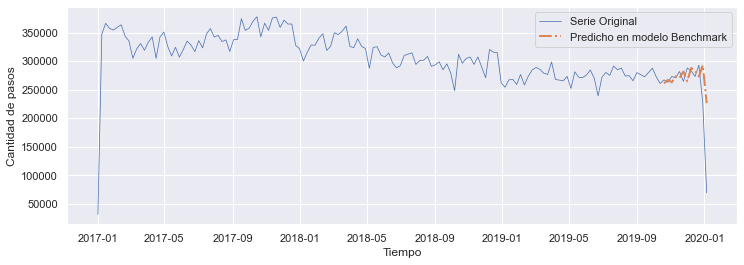

In [53]:
plt.figure(figsize=(12,4))
plt.plot(semanal_pred.index[:length_total1], semanal_pred[:length_total1],lw = 0.75, label = 'Serie Original')
plt.plot(semanal_pred.index[N_train1+look_back1: length_total1], y_test_pred_benchmark1,'-.', lw = 2, label = 'Predicho en modelo Benchmark')

plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasos')
plt.legend()
plt.show()

Los resultados obtenidos demuestran que al utilizar una granularidad semanal, el desempeño del modelo benchmark empeora notablemente, **incrementando el MAE por arriba de 27.800**. Si analizamos el **MAPE** en cambio, observamos que el mismo **disminuye** respecto del punto anterior, posicionandose cerca del **10%**, lo cual significa que a pesar de obtenerse un error mayor en valor absoluto, el mismo representa un menor porcentaje del promedio de autos que atraviesan la estación en esta granularidad temporal.

## Serie Mensual:

Por último, en el caso de la serie mensual, el modelo Benchmark es aquel en el que la cantidad de pasos (autos) predicha coincide con la cantidad de autos del mes anterior.

En este caso debemos separar la serie también en grupos de entrenamiento y prueba, y definir el look_back:

In [54]:
#Definimos una ventana de seis meses, sobre la cual se efectuará la predicción One-Step en el punto siguiente:
look_back2 = 6 

#Seleccionamos la variable que utilizaremos para alimentar nuestro modelo:
mensual_pred = mensual_depurado.cantidad_pasos

#Creamos las variables X e y, para rellenar luego con los valores correspondientes:
N2 = mensual_pred.shape[0]
X2 = np.zeros((N2 - look_back2,look_back2))
y2 = np.zeros(N2 - look_back2)

#Rellenamos los valores de X e y:
for i in range(X2.shape[0]):
    X2[i,:] = mensual_pred.iloc[i:i+look_back2]
    y2[i] = mensual_pred.iloc[i+look_back2]
    
#Dividimos en grupos de entrenamiento y prueba:
N_test2 = 3 #correspondiente al último trimestre del 2019
N_train2 = N2 - N_test2 - look_back2 # cantidad de instancias que vamos a usar para entrenar. 
N_total2 = N_train2 + N_test2

length_total2 = N_train2 + N_test2 + look_back2

#Definimos el grupo de entrenamiento
X_train2 = X2[:N_train2,:]
y_train2 = y2[:N_train2]

#Definimos el grupo de prueba
X_test2 = X2[N_train2:N_train2+N_test2,:]
y_test2 = y2[N_train2:N_train2+N_test2]

#Definimos el modelo benchmark, donde cada valor predicho coincide con el de la semana anterior:
y_test_pred_benchmark2 = y2[-1 + N_train2:N_train2+N_test2 - 1]

#Evaluamos el modelo sobre el grupo de prueba:
evaluar_modelo(y_test2, y_test_pred_benchmark2, X_test2, 'Test')

Error en Test: 8281.166666666666 - Porcentual(%): 0.6928503722360831


Observamos los resultados obtenidos gráficamente:

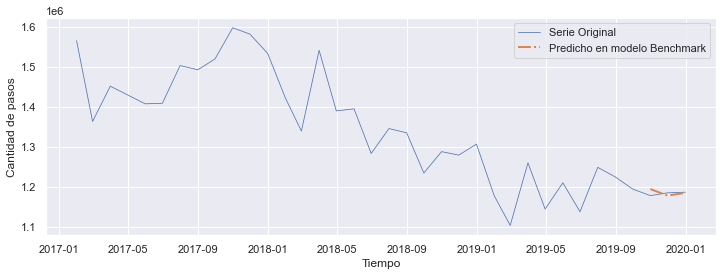

In [55]:
plt.figure(figsize=(12,4))
plt.plot(mensual_pred.index[:length_total2], mensual_pred[:length_total2],lw = 0.75, label = 'Serie Original')
plt.plot(mensual_pred.index[N_train2+look_back2: length_total2], y_test_pred_benchmark2,'-.', lw = 2, label = 'Predicho en modelo Benchmark')

plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasos')
plt.legend()
plt.show()

Como podemos ver en los resultados obtenidos, el modelo mensual mejoró su desempeño respecto al modelo semanal, obteniendo un **MAE de aproximadamente 8.300 pasos**, que representan un **2,5% de la cantidad promedio** de autos que pasan por mes por la estación. Este buen resultado puede estar dado por la **fuerte autocorrelación** que demostraba la serie mensual con los meses inmediatos anteriores.

A continuación realizaremos la predicción en las mismas tres granularidades temporales aplicando Machine Learning, a través de la técnica conocida como **One-Step Prediction**.

## B. One-Step Prediction:

La técnica de One-Step prediction consiste en aplicar un modelo de Machine Learning que prediga el siguiente valor en la serie de tiempo, utilizando como variables o features para su predicción, a los valores de la misma serie pero en una ventana de tiempo anterior ('look back').

En nuestro caso, las ventanas de tiempo seleccionadas fueron: **90 días** para la serie **diaria**, **12 semanas** para la serie **semanal**, y **seis meses** para la serie **mensual**.

El modelo que utilizaremos para realizar la predicción es el Random Forest Regressor, el cual entrenaremos, en primer lugar, con 100 árboles de decisión, y luego optimizaremos sus hiperparámetros con el objetivo de encontrar mejores resultados.

## Serie Diaria:

In [56]:
#Importamos e instanciamos el modelo:
from sklearn.ensemble import RandomForestRegressor

random_forest_diario = RandomForestRegressor(n_estimators=100, criterion = 'mae', random_state=42, n_jobs=-1)

#Entrenamos el modelo con los datos de entrenamiento de nuestra serie diaria:
random_forest_diario.fit(X_train,y_train)

#Predecimos sobre los grupos de entrenamiento y prueba:
y_train_pred = random_forest_diario.predict(X_train)
y_test_pred = random_forest_diario.predict(X_test)

#Evaluamos el desempeño del modelo en ambos grupos:
evaluar_modelo(y_train, y_train_pred, X_train, 'Train')
evaluar_modelo(y_test, y_test_pred, X_test, 'Test')

Error en Train: 1234.481827309237 - Porcentual(%): 2.770166889472706
Error en Test: 3537.3348731884053 - Porcentual(%): 9.02157673603993


Atendiendo a los resultados obtenidos, se puede decir que la predicción One-Step obtuvo un mejor desempeño que el modelo benchmark, ya que redujo el **MAE** sobre el grupo de prueba a un valor cercano a **3.500**, que representan el **9% del total de pasos promedio por día** de la estación.

Por otro lado, resulta importante destacar el bajo nivel de error sobre el **grupo de entrenamiento**, que tiene un **MAE** de sólo **1.200**, que representan casi el **2,8% del promedio de autos por día**, lo que nos podría estar indicando también que el modelo podría estar sobreajustando sobre estos datos.

A continuación observamos los resultados de la predicción gráficamente:

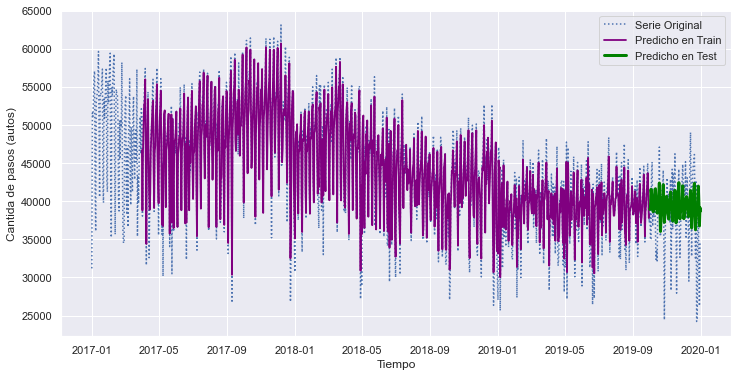

In [57]:
plt.figure(figsize=(12,6))
plt.plot(diario_pred.index[:length_total], diario_pred[:length_total],':', lw = 1.5, label = 'Serie Original')
plt.plot(diario_pred.index[look_back: look_back + N_train], y_train_pred,'-',lw = 1.8, label = 'Predicho en Train', color='purple')
plt.plot(diario_pred.index[N_train+look_back: length_total], y_test_pred,'-', lw = 3, label = 'Predicho en Test', color = 'green')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantida de pasos (autos)')
plt.show()

A continuación analizaremos cuáles variables está considerando el modelo como más importantes a la hora de realizar la predicción:

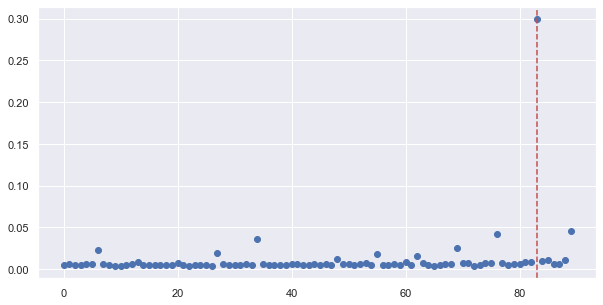

In [58]:
plt.figure(figsize = (10,5))
plt.scatter(np.arange(random_forest_diario.feature_importances_.size),random_forest_diario.feature_importances_)
plt.axvline(look_back - 7, linestyle ='--', color= 'r')
plt.show()

Si analizamos el gráfico anterior de derecha a izquierda, podemos ver que el **atributo con mayor importancia** en la predicción, es el valor que se encuentra 7 posiciones anteriores al último valor del gráfico, es decir, la **cantidad de pasos que hubo en la estación el mismo día, pero de la semana anterior**. Asimismo, podemos ver que el resto de los atributos que le siguen en importancia para la predicción se encuentran separados entre sí cada 7 días también, por lo cual se estaría usando el mismo día de semanas anteriores, lo cual reafirma lo que observábamos en el gráfico de autocorrelación anteriormente.

A continuación optimizaremos los hiperparámetros del modelo a través de la técnica de Random Search:

In [59]:
# #Definimos los valores de los hiperparámetros que queremos comparar:

# parametros = {'n_estimators': list(np.arange(50,325,25)), #cantidad de árboles
#               'max_depth': list(np.arange(1,20)),         #profundidad del árbol
#               'min_samples_split': list(np.arange(2,10)),
#               'min_samples_leaf': list(np.arange(1,5)),
#               'max_features':['auto', 'sqrt', 'log2']}

# #Importamos el modelo:
# from sklearn.model_selection import RandomizedSearchCV

# #Creamos el modelo aplicando validación cruzada en 5 pliegues y 250 iteraciones:
# random_search = RandomizedSearchCV(random_forest_diario, n_iter=250, param_distributions = parametros, cv=5, scoring='neg_mean_absolute_error')

# # Entrenamos el modelo sobre los datos de entrenamiento:
# random_search.fit(X_train, y_train)

# #Obtenemos los mejores parámetros y el mejor score o desempeño del modelo:
# print("Mejores parametros: "+str(random_search.best_params_))
# print("Mejor Score: "+str(random_search.best_score_)+'\n')

Aplicamos los parámetros obtenidos en el Random Search y evaluamos:

In [60]:
#creamos el modelo incluyendo los parámetros encontrados por el Random Search:
random_forest_diario2 = RandomForestRegressor(n_estimators=75,min_samples_split = 9, min_samples_leaf= 4,max_features= 'sqrt', max_depth= 10, criterion = 'mae', random_state=42, n_jobs=-1)

#Entrenamos el modelo con los datos de entrenamiento de nuestra serie diaria:
random_forest_diario2.fit(X_train,y_train)

#Predecimos sobre los grupos de entrenamiento y prueba:
y_train_pred = random_forest_diario2.predict(X_train)
y_test_pred = random_forest_diario2.predict(X_test)

#Evaluamos el desempeño del modelo en ambos grupos:
evaluar_modelo(y_train, y_train_pred, X_train, 'Train')
evaluar_modelo(y_test, y_test_pred, X_test, 'Test')

Error en Train: 2360.6421680662042 - Porcentual(%): 5.297261269632244
Error en Test: 3583.0958756038644 - Porcentual(%): 9.138285051652996


Como vemos el modelo con mejores parámetros encontrado por el Random Search obtiene un valor de MAE sobre el grupo de entrenamiento de 3.400 aproximadamente. Al incorporar los valores de los parámetros encontrados por el Random Search en nuestro modelo, obtenemos un MAE aproximado de 3.600 sobre el grupo de prueba, el cual es superior al que obtenía el modelo original, como también un mayor error para el grupo de entrenamiento (aumentando el sesgo y reduciendo levemente la varianza), por lo cual considero que no es necesario efectuar un cambio sobre los hiperparámetros originales.


Como el modelo de predicción One-Step consiste en predecir el siguiente valor en la serie de tiempo, tomando como atributos o features valores que haya asumido la misma serie en una ventana de tiempo anterior o look_back, el tamaño de ésta última se convierte otro parámetro sobre el que podríamos realizar una optimización, que realizaremos a continuación:

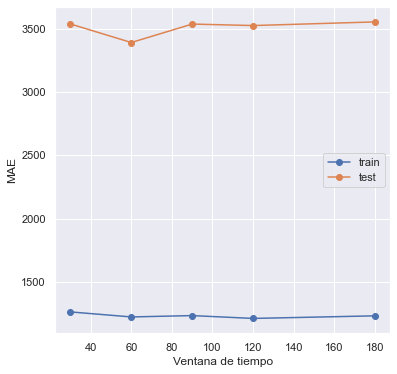

In [61]:
#Optimización manual de la ventana de tiempo o look_back:

# Definimos las listas vacias para los valores de MSE deseados:
lista_MAE_train_diario = []
lista_MAE_test_diario = []

# Definimos la lista de valores de 'look_back' que vamos a explorar:
look_backs_diarios = [30,60,90,120,180]

# Generamos un loop sobre los distintos valores de 'look_back':
for look_back_diario in look_backs_diarios:
    
    look_back_diario = look_back_diario 

    #Creamos las variables X e y, para rellenar luego con los valores correspondientes:
    N_diario = diario_pred.shape[0]
    X_diario = np.zeros((N_diario - look_back_diario,look_back_diario))
    y_diario = np.zeros(N_diario - look_back_diario)

    #Rellenamos los valores de X e y:
    for i in range(X_diario.shape[0]):
        X_diario[i,:] = diario_pred.iloc[i:i+look_back_diario]
        y_diario[i] = diario_pred.iloc[i+look_back_diario]

    #Dividimos en grupos de entrenamiento y prueba:
    N_test_diario = 92 #correspondiente a los días del último trimestre del 2019
    N_train_diario = N_diario - N_test_diario - look_back_diario # cantidad de instancias que vamos a usar para entrenar. 
    N_total_diario = N_train_diario + N_test_diario

    length_total_diario = N_train_diario + N_test_diario + look_back_diario

    #Definimos el grupo de entrenamiento
    X_train_diario = X_diario[:N_train_diario,:]
    y_train_diario = y_diario[:N_train_diario]

    #Definimos el grupo de prueba
    X_test_diario = X_diario[N_train_diario:N_train_diario+N_test_diario,:]
    y_test_diario = y_diario[N_train_diario:N_train_diario+N_test_diario]
            
    # Definir el modelo con el valor de profundidad
    rf_diario = RandomForestRegressor(n_estimators=100, criterion = 'mae', random_state=42)
    
    # Entrenar el modelo
    rf_diario.fit(X_train_diario,y_train_diario)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred_diario = rf_diario.predict(X_train_diario)
    train_MAE_diario = mean_absolute_error(y_train_diario, y_train_pred_diario)
   
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred_diario = rf_diario.predict(X_test_diario)
    test_MAE_diario = mean_absolute_error(y_test_diario, y_test_pred_diario)
    
    # Agregar la información a las listas
    lista_MAE_train_diario.append(train_MAE_diario)
    lista_MAE_test_diario.append(test_MAE_diario)
    
#Luego analizamos el desempeño del modelo para los distintos valores de look_back gráficamente:
matplotlib.rcParams['figure.figsize'] = [6,6]
plt.plot(look_backs_diarios,lista_MAE_train_diario,'o-',label='train')
plt.plot(look_backs_diarios,lista_MAE_test_diario,'o-',label='test')
plt.legend()
plt.xlabel('Ventana de tiempo');
plt.ylabel('MAE');

De acuerdo a lo observado en este último gráfico, con una ventana (o **look_back**) de **60 días** es cuando se obtiene un **nivel más bajo de error** en el grupo de prueba, por lo que a continuación evaluaremos nuevamente el modelo utilizando dicha ventana temporal:

In [62]:
#Definimos una ventana de 60 días, sobre la cual se obtendrán los valores o atributos para realizar la predicción One-Step:
look_back = 60 

#Seleccionamos la variable que utilizaremos para alimentar nuestro modelo:
diario_pred = diario_depurado.cantidad_pasos

#Creamos las variables X e y, para rellenar luego con los valores correspondientes:
N = diario_pred.shape[0]
X = np.zeros((N - look_back,look_back))
y = np.zeros(N - look_back)

#Rellenamos los valores de X e y:
for i in range(X.shape[0]):
    X[i,:] = diario_pred.iloc[i:i+look_back]
    y[i] = diario_pred.iloc[i+look_back]
    
#Dividimos en grupos de entrenamiento y prueba:
N_test = 92 #correspondiente a los días del último trimestre del 2019
N_train = N - N_test - look_back # cantidad de instancias que vamos a usar para entrenar. 
N_total = N_train + N_test

length_total = N_train + N_test + look_back

#Definimos el grupo de entrenamiento
X_train = X[:N_train,:]
y_train = y[:N_train]

#Definimos el grupo de prueba
X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]

#Entrenamos el modelo con los datos de entrenamiento de nuestra serie diaria:
random_forest_diario.fit(X_train,y_train)

#Predecimos sobre los grupos de entrenamiento y prueba:
y_train_pred = random_forest_diario.predict(X_train)
y_test_pred = random_forest_diario.predict(X_test)

#Evaluamos el desempeño del modelo en ambos grupos:
evaluar_modelo(y_train, y_train_pred, X_train, 'Train')
evaluar_modelo(y_test, y_test_pred, X_test, 'Test')

Error en Train: 1223.8155585012373 - Porcentual(%): 2.747400981036016
Error en Test: 3391.645226449276 - Porcentual(%): 8.68098621597476


Tal cual se observa en los resultados obtenidos, al reducir la ventana de tiempo a 60 días, se redujo también el MAE sobre el grupo de prueba, alcanzando un valor de **3.391,65**, que representa el **8.7 % de la cantidad de autos promedio diaria**.

Observamos los resultados de la última predicción gráficamente:

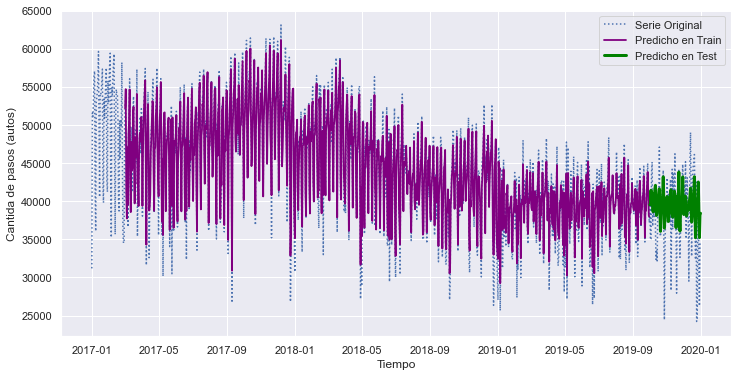

In [63]:
plt.figure(figsize=(12,6))
plt.plot(diario_pred.index[:length_total], diario_pred[:length_total],':', lw = 1.5, label = 'Serie Original')
plt.plot(diario_pred.index[look_back: look_back + N_train], y_train_pred,'-',lw = 1.8, label = 'Predicho en Train', color='purple')
plt.plot(diario_pred.index[N_train+look_back: length_total], y_test_pred,'-', lw = 3, label = 'Predicho en Test', color = 'green')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantida de pasos (autos)')
plt.show()

## Serie Semanal:

In [64]:
#Instanciamos el modelo:
random_forest_semanal = RandomForestRegressor(n_estimators=100, criterion = 'mae', random_state=42)

#Entrenamos el modelo con los datos de entrenamiento de nuestra serie diaria:
random_forest_semanal.fit(X_train1,y_train1)

#Predecimos sobre los grupos de entrenamiento y prueba:
y_train_pred1 = random_forest_semanal.predict(X_train1)
y_test_pred1 = random_forest_semanal.predict(X_test1)

#Evaluamos el desempeño del modelo en ambos grupos:
evaluar_modelo(y_train1, y_train_pred1, X_train1, 'Train')
evaluar_modelo(y_test1, y_test_pred1, X_test1, 'Test')

Error en Train: 5194.041256218906 - Porcentual(%): 1.6662848517913904
Error en Test: 28831.475138888887 - Porcentual(%): 10.543751764785938


De acuerdo a los resultados obtenidos, se observa que al utilizar la **granularidad semanal**, el **MAE incrementa aproximadamente a 28.800**, lo que representa un **10,50 %** del **promedio de autos que atraviesa la estación de peaje semanalmente**.

Observamos la predicción realizada gráficamente:

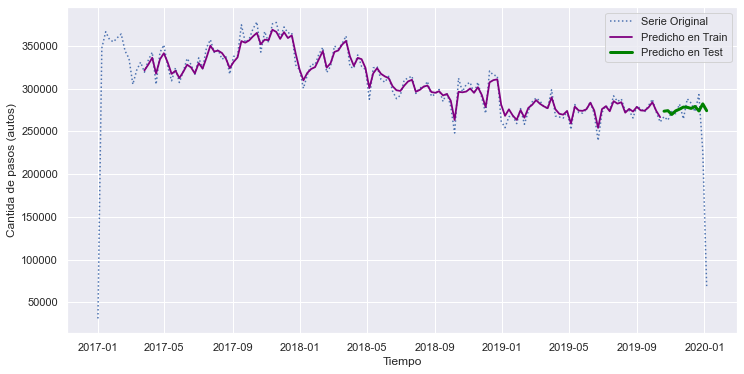

In [65]:
plt.figure(figsize=(12,6))
plt.plot(semanal_pred.index[:length_total1], semanal_pred[:length_total1],':', lw = 1.5, label = 'Serie Original')
plt.plot(semanal_pred.index[look_back1: look_back1 + N_train1], y_train_pred1,'-',lw = 1.8, label = 'Predicho en Train', color='purple')
plt.plot(semanal_pred.index[N_train1+look_back1: length_total1], y_test_pred1,'-', lw = 3, label = 'Predicho en Test', color = 'green')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantida de pasos (autos)')
plt.show()

Analizamos las variables que el modelo está considerando como importantes para la predicción:

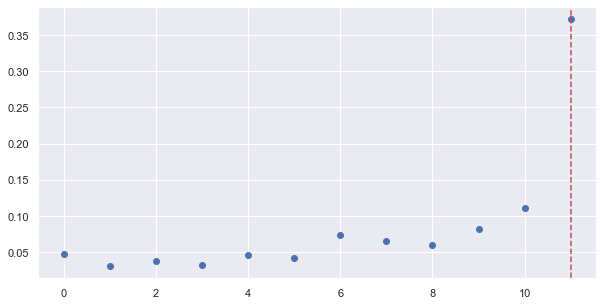

In [66]:
plt.figure(figsize = (10,5))
plt.scatter(np.arange(random_forest_semanal.feature_importances_.size),random_forest_semanal.feature_importances_)
plt.axvline(look_back1 - 1, linestyle ='--', color= 'r')
plt.show()

Tal cual nos muestran los gráficos anteriores, la predicción a nivel semanal tiene un desempeño bastante bueno sobre los datos de entrenamiento, pero empeora al predecir sobre los datos de prueba, siendo la cantidad de autos de la semana anterior el valor más importante para realizar la predicción.

A continuación se realizará una optimización manual sobre las ventanas de tiempo utilizadas con el objeto de encontrar un mejor resultado:

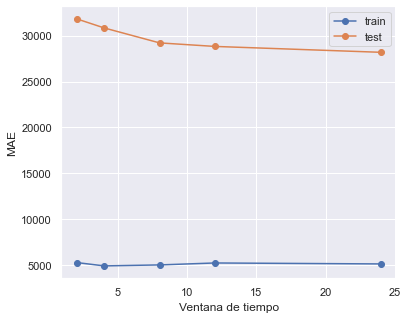

In [67]:
#Optimización manual de la ventana de tiempo o look_back:

# Definimos las listas vacias para los valores de MSE deseados:
lista_MAE_train_semanal = []
lista_MAE_test_semanal = []

# Definimos la lista de valores de 'look_back' que vamos a explorar:
look_backs_semanales = [2,4,8,12,24]

# Generamos un loop sobre los distintos valores de 'look_back':
for look_back_semanal in look_backs_semanales:
    
    look_back_semanal = look_back_semanal 

    #Creamos las variables X e y, para rellenar luego con los valores correspondientes:
    N_semanal = semanal_pred.shape[0]
    X_semanal = np.zeros((N_semanal - look_back_semanal,look_back_semanal))
    y_semanal = np.zeros(N_semanal - look_back_semanal)

    #Rellenamos los valores de X e y:
    for i in range(X_semanal.shape[0]):
        X_semanal[i,:] = semanal_pred.iloc[i:i+look_back_semanal]
        y_semanal[i] = semanal_pred.iloc[i+look_back_semanal]

    #Dividimos en grupos de entrenamiento y prueba:
    N_test_semanal =  12 #correspondiente a las semanas del último trimestre del 2019
    N_train_semanal = N_semanal - N_test_semanal - look_back_semanal # cantidad de instancias que vamos a usar para entrenar. 
    N_total_semanal = N_train_semanal + N_test_semanal

    length_total_semanal = N_train_semanal + N_test_semanal + look_back_semanal

    #Definimos el grupo de entrenamiento
    X_train_semanal = X_semanal[:N_train_semanal,:]
    y_train_semanal = y_semanal[:N_train_semanal]

    #Definimos el grupo de prueba
    X_test_semanal = X_semanal[N_train_semanal:N_train_semanal+N_test_semanal,:]
    y_test_semanal = y_semanal[N_train_semanal:N_train_semanal+N_test_semanal]
            
    # Definir el modelo con el valor de profundidad
    rf_semanal = RandomForestRegressor(n_estimators=100, criterion = 'mae', random_state=42)
    
    # Entrenar el modelo
    rf_semanal.fit(X_train_semanal,y_train_semanal)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred_semanal = rf_semanal.predict(X_train_semanal)
    train_MAE_semanal = mean_absolute_error(y_train_semanal, y_train_pred_semanal)
   
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred_semanal = rf_semanal.predict(X_test_semanal)
    test_MAE_semanal = mean_absolute_error(y_test_semanal, y_test_pred_semanal)
    
    # Agregar la información a las listas
    lista_MAE_train_semanal.append(train_MAE_semanal)
    lista_MAE_test_semanal.append(test_MAE_semanal)
    
#Luego analizamos el desempeño del modelo para los distintos valores de look_back gráficamente:
matplotlib.rcParams['figure.figsize'] = [6,5]
plt.plot(look_backs_semanales,lista_MAE_train_semanal,'o-',label='train')
plt.plot(look_backs_semanales,lista_MAE_test_semanal,'o-',label='test')
plt.legend()
plt.xlabel('Ventana de tiempo');
plt.ylabel('MAE');

De acuerdo a los resultados observados, no existe una diferencia considerable en el desempeño del modelo al cambiar los valores de la ventana temporal.

## Serie Mensual:

In [68]:
#Instanciamos el modelo:
random_forest_mensual = RandomForestRegressor(n_estimators=100, criterion = 'mae', random_state=42)

#Entrenamos el modelo con los datos de entrenamiento de nuestra serie diaria:
random_forest_mensual.fit(X_train2,y_train2)

#Predecimos sobre los grupos de entrenamiento y prueba:
y_train_pred2 = random_forest_mensual.predict(X_train2)
y_test_pred2 = random_forest_mensual.predict(X_test2)

#Evaluamos el desempeño del modelo en ambos grupos:
evaluar_modelo(y_train2, y_train_pred2, X_train2, 'Train')
evaluar_modelo(y_test2, y_test_pred2, X_test2, 'Test')

Error en Train: 25096.32490740743 - Porcentual(%): 1.8390390235032381
Error en Test: 17978.06416666663 - Porcentual(%): 1.5041489866515383


Tal cual demuestran los resultados anteriores, al trabajar con la **granularidad mensual** se observa un **incremento considerable en el MAE sobre el grupo de entrenamiento**, superando al grupo de prueba con un **MAE aproximado de 25.000**, mientras que el MAE de este último alcanzó un valor casi de 18.000, que representa sólo un **1,5% del promedio mensual de autos que pasa por la estación**, por lo cual el resultado es muy bueno.

Observamos el desempeño del modelo gráficamente:

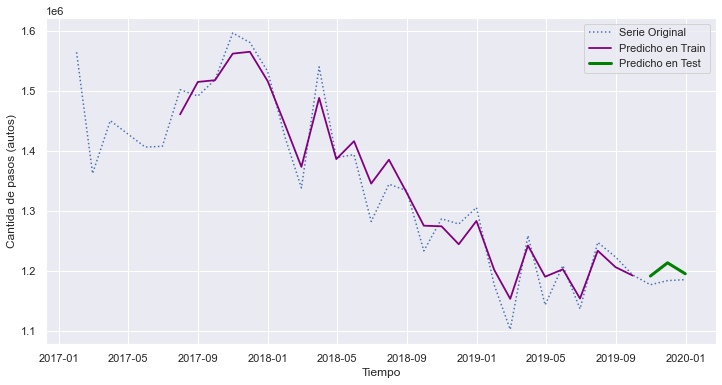

In [69]:
plt.figure(figsize=(12,6))
plt.plot(mensual_pred.index[:length_total2], mensual_pred[:length_total2],':', lw = 1.5, label = 'Serie Original')
plt.plot(mensual_pred.index[look_back2: look_back2 + N_train2], y_train_pred2,'-',lw = 1.8, label = 'Predicho en Train', color='purple')
plt.plot(mensual_pred.index[N_train2 +look_back2: length_total2], y_test_pred2,'-', lw = 3, label = 'Predicho en Test', color = 'green')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantida de pasos (autos)')
plt.show()

Analizamos las variables que el modelo está considerando como importantes para la predicción:

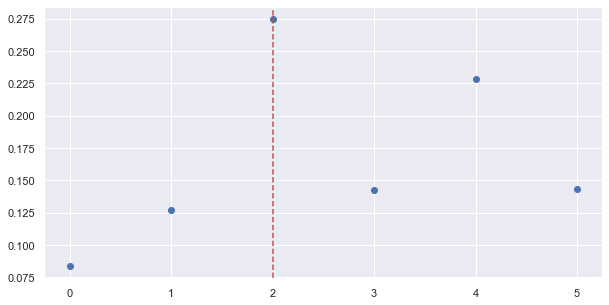

In [70]:
plt.figure(figsize = (10,5))
plt.scatter(np.arange(random_forest_mensual.feature_importances_.size),random_forest_mensual.feature_importances_)
plt.axvline(look_back2 - 4, linestyle ='--', color= 'r')
plt.show()

Tal cual se observa en los gráficos anteriores, el modelo estaría realizando una predicción más elevada a los valores originales, y considera como atributo más importante a la hora de realizar la predicción al cuarto mes inmediato anterior.

A continuación realizaremos también una optimización de la ventana de tiempo utilizada:

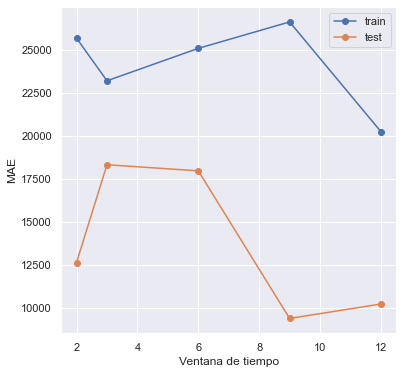

In [71]:
#Optimización manual de la ventana de tiempo o look_back:

# Definimos las listas vacias para los valores de MSE deseados:
lista_MAE_train_mensual = []
lista_MAE_test_mensual = []

# Definimos la lista de valores de 'look_back' que vamos a explorar:
look_backs_mensuales = [2,3,6,9,12]

# Generamos un loop sobre los distintos valores de 'look_back':
for look_back_mensual in look_backs_mensuales:
    
    look_back_mensual = look_back_mensual 

    #Creamos las variables X e y, para rellenar luego con los valores correspondientes:
    N_mensual = mensual_pred.shape[0]
    X_mensual = np.zeros((N_mensual - look_back_mensual,look_back_mensual))
    y_mensual = np.zeros(N_mensual - look_back_mensual)

    #Rellenamos los valores de X e y:
    for i in range(X_mensual.shape[0]):
        X_mensual[i,:] = mensual_pred.iloc[i:i+look_back_mensual]
        y_mensual[i] = mensual_pred.iloc[i+look_back_mensual]

    #Dividimos en grupos de entrenamiento y prueba:
    N_test_mensual =  3 #correspondiente a los 3 últimos meses de 2019:
    N_train_mensual = N_mensual - N_test_mensual - look_back_mensual # cantidad de instancias que vamos a usar para entrenar. 
    N_total_mensual = N_train_mensual + N_test_mensual

    length_total_mensual = N_train_mensual + N_test_mensual + look_back_mensual

    #Definimos el grupo de entrenamiento
    X_train_mensual = X_mensual[:N_train_mensual,:]
    y_train_mensual = y_mensual[:N_train_mensual]

    #Definimos el grupo de prueba
    X_test_mensual = X_mensual[N_train_mensual:N_train_mensual+N_test_mensual,:]
    y_test_mensual = y_mensual[N_train_mensual:N_train_mensual+N_test_mensual]
            
    # Definir el modelo con el valor de profundidad
    rf_mensual = RandomForestRegressor(n_estimators=100, criterion = 'mae', random_state=42)
    
    # Entrenar el modelo
    rf_mensual.fit(X_train_mensual,y_train_mensual)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred_mensual = rf_mensual.predict(X_train_mensual)
    train_MAE_mensual = mean_absolute_error(y_train_mensual, y_train_pred_mensual)
   
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred_mensual = rf_mensual.predict(X_test_mensual)
    test_MAE_mensual = mean_absolute_error(y_test_mensual, y_test_pred_mensual)
    
    # Agregar la información a las listas
    lista_MAE_train_mensual.append(train_MAE_mensual)
    lista_MAE_test_mensual.append(test_MAE_mensual)
    
#Luego analizamos el desempeño del modelo para los distintos valores de look_back gráficamente:
matplotlib.rcParams['figure.figsize'] = [6,6]
plt.plot(look_backs_mensuales,lista_MAE_train_mensual,'o-',label='train')
plt.plot(look_backs_mensuales,lista_MAE_test_mensual,'o-',label='test')
plt.legend()
plt.xlabel('Ventana de tiempo');
plt.ylabel('MAE');

El gráfico anterior nos demuestra una situación bastante particular: en **todas** las distintas **ventanas temporales**, el modelo tiene un **mejor desempeño sobre los datos de prueba que sobre los de entrenamiento**, siendo la ventana con **menor MAE para ambos grupos** la anual (**12 meses**).

Por tal motivo, a continuación se fijará dicho valor de look_back para volver a entrenar y evaluar el modelo, y analizar los resultados:

In [72]:
#Definimos una ventana de un año:
look_back2 = 12 

#Creamos las variables X e y, para rellenar luego con los valores correspondientes:
N2 = mensual_pred.shape[0]
X2 = np.zeros((N2 - look_back2,look_back2))
y2 = np.zeros(N2 - look_back2)

#Rellenamos los valores de X e y:
for i in range(X2.shape[0]):
    X2[i,:] = mensual_pred.iloc[i:i+look_back2]
    y2[i] = mensual_pred.iloc[i+look_back2]
    
#Dividimos en grupos de entrenamiento y prueba:
N_test2 = 3 #correspondiente al último trimestre del 2019
N_train2 = N2 - N_test2 - look_back2 # cantidad de instancias que vamos a usar para entrenar. 
N_total2 = N_train2 + N_test2

length_total2 = N_train2 + N_test2 + look_back2

#Definimos el grupo de entrenamiento
X_train2 = X2[:N_train2,:]
y_train2 = y2[:N_train2]

#Definimos el grupo de prueba
X_test2 = X2[N_train2:N_train2+N_test2,:]
y_test2 = y2[N_train2:N_train2+N_test2]

#Entrenamos el modelo con los datos de entrenamiento de nuestra serie mensual:
random_forest_mensual.fit(X_train2,y_train2)

#Predecimos sobre los grupos de entrenamiento y prueba:
y_train_pred2 = random_forest_mensual.predict(X_train2)
y_test_pred2 = random_forest_mensual.predict(X_test2)

#Evaluamos el desempeño del modelo en ambos grupos:
evaluar_modelo(y_train2, y_train_pred2, X_train2, 'Train')
evaluar_modelo(y_test2, y_test_pred2, X_test2, 'Test')

Error en Train: 20257.222142857143 - Porcentual(%): 1.4743569223815902
Error en Test: 10238.295000000004 - Porcentual(%): 0.8493397057861544


Al cambiar el tamaño de la ventana temporal **se redujo el MAE** sobre ambos grupos, alcanzando un valor de **10.200 sobre el grupo de prueba**, que representan apenas un **0.85% de la cantidad promedio de autos** que pasan por la estación de peaje al mes.

A continuación observamos los valores obtenidos por esta última predicción gráficamente:

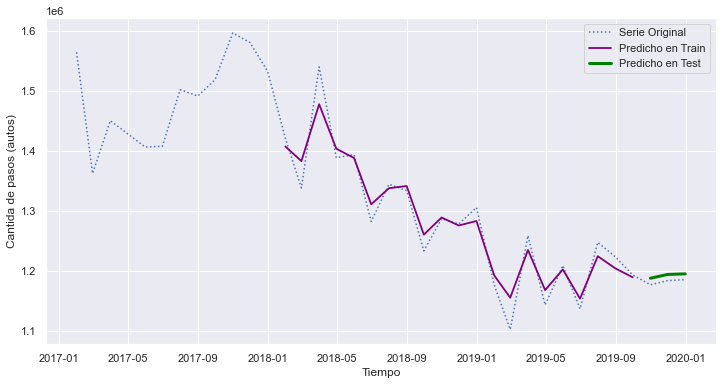

In [73]:
plt.figure(figsize=(12,6))
plt.plot(mensual_pred.index[:length_total2], mensual_pred[:length_total2],':', lw = 1.5, label = 'Serie Original')
plt.plot(mensual_pred.index[look_back2: look_back2 + N_train2], y_train_pred2,'-',lw = 1.8, label = 'Predicho en Train', color='purple')
plt.plot(mensual_pred.index[N_train2 +look_back2: length_total2], y_test_pred2,'-', lw = 3, label = 'Predicho en Test', color = 'green')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantida de pasos (autos)')
plt.show()

Tal cual se puede observar en la figura anterior, al incrementar la ventana temporal o look back la predicción es mucho más acertada.

## C. Multi-Step Prediction:

La técnica de predicción Multi-Step consiste en un modelo recursivo en el cual se parte de un predictor a un paso ('One-Step') ya entrenado, al cual se le va agregando a las variables predictoras o atributos, el resultado de esa predicción.

Trabajaremos nuevamente en las tres granularidades temporales de nuestra serie de tiempo: Diaria, Semanal y Mensual.

## Serie Diaria:

Para realizar esta predicción, se toma el mismo modelo Random Forest utilizado en la predicción One-Step, para luego incorporar los valores predichos por el mismo como atributos para predicciones posteriores.

Error en Test: 3695.2343750000005 - Porcentual(%): 9.458028930624316


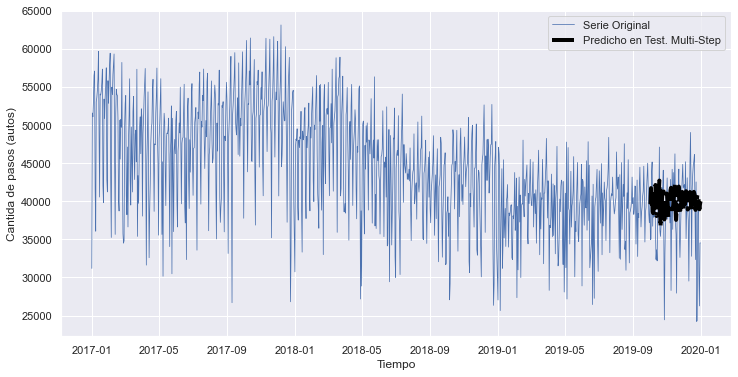

In [74]:
y_ms_test_pred = [] #lista donde se guardarán las predicciones Multi-Step
x = X_test[0,:] # arrancamos con la primera instancias del conjunto de test

for i in range(y_test.size):
    y_os_pred = random_forest_diario.predict(x.reshape(1,-1))
    y_ms_test_pred.append(y_os_pred)
    x = np.append(x[1:], y_os_pred)

y_ms_test_pred = np.array(y_ms_test_pred)

#Evaluamos el desempeño del modelo en ambos grupos:
evaluar_modelo(y_test, y_ms_test_pred, X_test, 'Test')

#Observamos los valores de la predicción gráficamente:
plt.figure(figsize=(12,6))
plt.plot(diario_pred.index[:length_total], diario_pred[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(diario_pred.index[N_train+look_back: length_total], y_ms_test_pred,'-.', lw = 4, label = 'Predicho en Test. Multi-Step', color='black')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantida de pasos (autos)')
plt.show()

Tal cual se puede ver en los resultados obtenidos, la **predicción Multi-Step** realizada para el **último trimestre de 2019** (grupo de prueba) arroja un **MAE de 3.695**, que representa un **9,45% de la cantidad promedio de autos diaria**.

Cabe tener en cuenta que como la predicción Multi-Step incluye como variables predictoras a valores predichos por el mismo modelo, el mismo puede acumular errores a medida que nos alejemos de los datos medidos originalmente.

## Serie Semanal:

Error en Test: 27597.674305555545 - Porcentual(%): 10.092547320643366


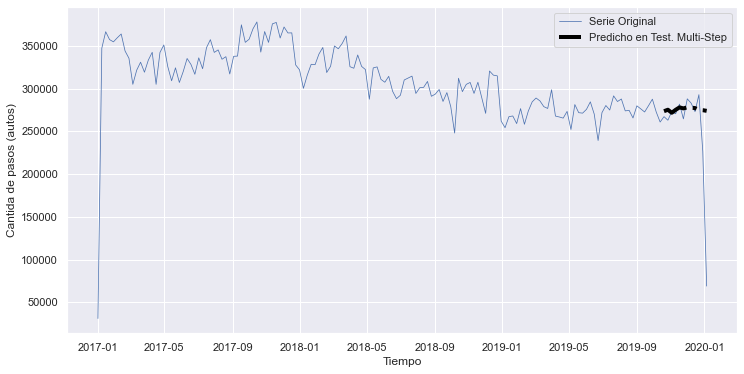

In [75]:
y_ms_test_pred1 = [] #lista donde se guardarán las predicciones Multi-Step
x1 = X_test1[0,:] # arrancamos con la primera instancias del conjunto de test

for i in range(y_test1.size):
    y_os_pred1 = random_forest_semanal.predict(x1.reshape(1,-1))
    y_ms_test_pred1.append(y_os_pred1)
    x1 = np.append(x1[1:], y_os_pred1)

y_ms_test_pred1 = np.array(y_ms_test_pred1)

#Evaluamos el desempeño del modelo en ambos grupos:
evaluar_modelo(y_test1, y_ms_test_pred1, X_test1, 'Test')

#Observamos los valores de la predicción gráficamente:
plt.figure(figsize=(12,6))
plt.plot(semanal_pred.index[:length_total1], semanal_pred[:length_total1],lw = 0.75, label = 'Serie Original')
plt.plot(semanal_pred.index[N_train1+look_back1: length_total1], y_ms_test_pred1,'-.', lw = 4, label = 'Predicho en Test. Multi-Step', color='black')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantida de pasos (autos)')
plt.show()

En este caso, la predicción Multi-Step arroja sorprendentemente un **MAE levemente inferior al obtenido en la predicción One-Step**, con un valor que representa el **10,09% del promedio de autos por semana**.

## Serie Mensual:

Error en Test: 9920.700000000032 - Porcentual(%): 0.8229929318497589


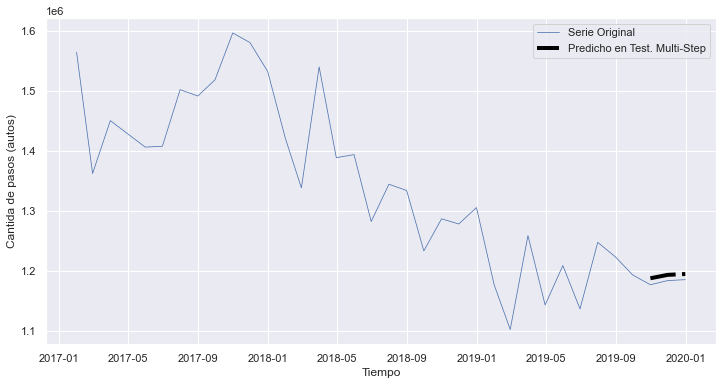

In [76]:
y_ms_test_pred2 = [] #lista donde se guardarán las predicciones Multi-Step
x2 = X_test2[0,:] # arrancamos con la primera instancias del conjunto de test

for i in range(y_test2.size):
    y_os_pred2 = random_forest_mensual.predict(x2.reshape(1,-1))
    y_ms_test_pred2.append(y_os_pred2)
    x2 = np.append(x2[1:], y_os_pred2)

y_ms_test_pred2 = np.array(y_ms_test_pred2)

#Evaluamos el desempeño del modelo en ambos grupos:
evaluar_modelo(y_test2, y_ms_test_pred2, X_test2, 'Test')

#Observamos los valores de la predicción gráficamente:
plt.figure(figsize=(12,6))
plt.plot(mensual_pred.index[:length_total2], mensual_pred[:length_total2],lw = 0.75, label = 'Serie Original')
plt.plot(mensual_pred.index[N_train2+look_back2: length_total2], y_ms_test_pred2,'-.', lw = 4, label = 'Predicho en Test. Multi-Step', color='black')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantida de pasos (autos)')
plt.show()

En el caso de la serie mensual, la predicción Multi-Step obtiene un **MAE levemente inferior al obtenido en la predicción One-Step**, alcanzando un valor de **9.900 (0.82%)**, pero tal cual se mencionó anteriormente, este modelo no es el más confiable debido a que puede arrastrar error de predicciones anteriores.

## D. Predicción para el año 2020

A continuación se realizará una estimación del tráfico para el año 2020 a través de la técnica de **Multi-Step Prediction** para las **series diaria y mensual**. Para llevar esto a cabo, partiremos de los modelos ya entrenados con los datos de 2019, y luego realizaremos predicciones sucesivas para los valores siguientes en ambas series.

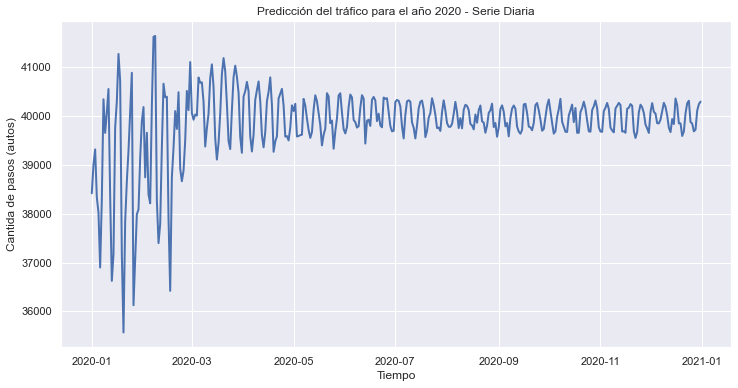

In [77]:
## PREDICCIÓN PARA LA SERIE DIARIA:
y_ms_test_pred_2020 = [] #lista donde se guardarán las predicciones Multi-Step para el 2020
x_2020 = X_test[91,:] # arrancamos con la última instancia del conjunto de test

for i in range(366):
    y_os_pred_diario = random_forest_diario.predict(x_2020.reshape(1,-1)) #tomamos el modelo ya entrenado
    y_ms_test_pred_2020.append(y_os_pred_diario)
    x_2020 = np.append(x_2020[1:], y_os_pred_diario)

y_ms_test_pred_2020 = np.array(y_ms_test_pred_2020)

#Observamos los resultados de la predicción gráficamente:

rango_fechas_diario = pd.date_range(start='01-01-2020', end='31-12-2020', freq = 'd') #establecemos el rango de fechas sobre el que vamos a graficar
plt.figure(figsize=(12,6))
plt.plot(rango_fechas_diario, y_ms_test_pred_2020, lw = 2)
plt.xlabel('Tiempo')
plt.ylabel('Cantida de pasos (autos)')
plt.title('Predicción del tráfico para el año 2020 - Serie Diaria')
plt.show()

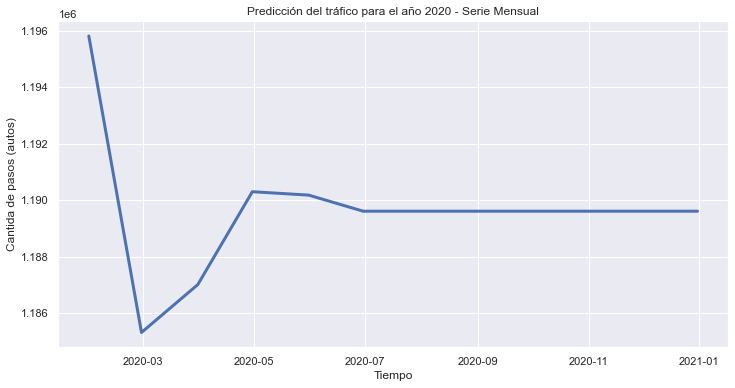

In [78]:
## PREDICCIÓN PARA LA SERIE MENSUAL:
y_ms_test_pred_2020M = [] #lista donde se guardarán las predicciones Multi-Step para el 2020
x_2020M = X_test2[2,:] # arrancamos con la última instancia del conjunto de test

for i in range(12):
    y_os_pred_mensual = random_forest_mensual.predict(x_2020M.reshape(1,-1))
    y_ms_test_pred_2020M.append(y_os_pred_mensual)
    x_2020M = np.append(x_2020M[1:], y_os_pred_mensual)

y_ms_test_pred_2020M = np.array(y_ms_test_pred_2020M)

#Observamos los resultados de la predicción gráficamente:

rango_fechas_mensual = pd.date_range(start='01-01-2020', end='31-12-2020', freq = 'M') #establecemos el rango de fechas sobre el que vamos a graficar
plt.figure(figsize=(12,6))
plt.plot(rango_fechas_mensual, y_ms_test_pred_2020M, lw = 3)
plt.xlabel('Tiempo')
plt.ylabel('Cantida de pasos (autos)')
plt.title('Predicción del tráfico para el año 2020 - Serie Mensual')
plt.show()

Tal cual se puede ver en los gráficos anteriores, a medida que nos alejamos de las mediciones de 2019, los valores de las predicciones tienden a estabilizarse en un valor determinado de la serie, cercano al valor de la media para la serie de tiempo. Cabe recordar que esto se da porque a medida que nos alejamos de las mediciones del 2019, el modelo empieza a acumular el error de las predicciones anteriores. 

# 3. CONCLUSIONES:

El objetivo de este proyecto era predecir el tráfico de la autopista Illia para el último trimestre de 2019, para lo cual se trabajó en diferentes granularidades temporales (diaria, semanal y mensual) con objeto de encontrar aquella que nos diera como resultado el menor error posible en la predicción. Esto fue logrado por el modelo de **One-Step Prediction para la serie Mensual**, que obtuvo un **error absoluto medio (MAE) de 10.200 sobre el grupo de prueba**, mientras que el **error porcentual absoluto medio (MAPE)** fue de tan sólo **0.85**, lo que que representa apenas un **0.85% de la cantidad promedio de autos** que pasan por la estación de peaje al mes.

De todos modos, resulta importante mencionar que la **elección de la granularidad temporal o frecuencia de muestro** con la cual debemos trabajar en nuestras predicciones va a **depender** en realidad de la **naturaleza del problema**: por ejemplo si necesitamos realizar una predicción de futuros embotellamientos en la autopista, seguramente necesitemos trabajar con la serie diaria (u horaria incluso), pero si por otro lado sólo necesitamos el número de autos que van a pasar por la estación para hacer un estimado de recaudación de la misma, tal vez trabajar con la serie mensual sea suficiente.

Por otro lado, considero que si incorporáramos información de años anteriores al modelo, el resultado de la predicción no mejoraría mucho debido a la tendencia negativa de la serie, ya que se obtendrían como resultado predicciones de valor más elevado, incrementando el error. Asimismo, considero si quisieramos incorporar la información correspondiente a tipo de vehículo, forma de pago, sentido, día de la semana, etc., la mejor forma de hacerlo sería creando un modelo para cada una de las distintas variables categóricas, ya que los únicos atributos o predictores que utilizan los modelos One-Step o Multi-Step para realizar la predicción son observaciones de la serie de tiempo en momentos anteriores.

Por último, cabe destacar que si bien los resultados obtenidos por las predicciones para el último trimestre de 2019 a través de la tecnica **Multi-Step** son buenos (bajo nivel de error, incluso inferior que la técnica de One-Step para el caso de la serie mensual), estos modelos pueden **acumular errores** al incluir valores predichos como atributos para las predicciones posteriores, situación que se potencia al alejarnos de los datos medidos originalmente y que pudimos comprobar al realizar la predicción del tráfico para el año 2020.

Para finalizar, considero que sería interesante **incorporar al proyecto** predicciones realizadas a través de **otro tipo de modelos**, como por ejemplo los **Autoregresivos**, y los incorporados en librerías específicas para trabajar con Series de Tiempo, como **Prophet** o **AutoTS**. Esto será realizado para la próxima entrega, en el Informe Final de carrera.